In [ ]:
pip install imbalanced-learn

**Importing Required Libraries**

In [ ]:
# Import Important Libraries
# Data manipulation and numerical operations
import pandas as pd
import numpy as np
import math


# Regular expressions
import re


# Data visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import seaborn as sns

# Imputation for missing data
from sklearn.impute import SimpleImputer


# Statistical functions
from scipy.stats import skew, median_abs_deviation
from scipy import stats

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Machine learning models and utilities
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Time tracking
import time


**Connection to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining  the file path
file_locatiob_train = '/content/drive/My Drive/stepbystepdis/train.csv'
file_location_test = '/content/drive/My Drive/stepbystepdis/test-3.csv'

**Read the file**

In [ ]:


# Read the CSV file
step_train10 = pd.read_csv(file_locatiob_train)


# Read the CSV file
dis_test10 = pd.read_csv(file_location_test)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(step_train10.head())

print(step_train10.info())

<ipython-input-8-8ff55f5bc031>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  step_train10 = pd.read_csv(file_locatiob_train)


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

**Getting Number of rows and columns**

In [ ]:
# Get the number of rows and columns
step_train_shape = step_train10.shape
dis_test_shape = dis_test10.shape

#printing the results
print(f"step_train10 has {step_train_shape[0]} rows and {step_train_shape[1]} columns.")
print(f"dis_test10 has {dis_test_shape[0]} rows and {dis_test_shape[1]} columns.")

step_train10 has 100000 rows and 28 columns.
dis_test10 has 50000 rows and 27 columns.


In [ ]:
# Perform descriptive statistical analysis
descriptive_statistics = step_train10.describe()

# Display the descriptive statistics
print(descriptive_statistics)

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

**Dropping Unwanted Columns**

In [ ]:
# Drop specified columns
columns_to10_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Type_of_Loan', 'Name', 'Monthly_Inhand_Salary', 'Credit_History_Age']
step_train10 = step_train10.drop(columns=columns_to10_drop)

**Printing Unique Values**

In [ ]:
# Loop through each column in the step_train10 DataFrame
for column in step_train10.columns:

    # Get unique values for the current column using .unique() method
    unique_values = step_train10[column].unique()

    # Print the name of the current column
    print(f"\nUnique values in {column}:")

    # Print the unique values for the current column
    print(unique_values)



Unique values in Age:
['23' '-500' '28_' ... '4808_' '2263' '1342']

Unique values in Occupation:
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Unique values in Annual_Income:
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

Unique values in Num_Bank_Accounts:
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1016  333 1265  791
  427  563  905 1190 1036 1611   38  619  555 1769  280  752 1201  812
 1487  222  212 1019 1222  610 1714 1308  525 1158 1115 1616  754 1601
  

In [ ]:
step_train10.describe(include='object').T

,count,unique,top,freq
Age,100000,1788,38,2833
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Credit_Mix,100000,4,Standard,36479
Outstanding_Debt,100000,13178,1360.45,24
Payment_of_Min_Amount,100000,3,Yes,52326
Amount_invested_monthly,95521,91049,__10000__,4305


In [ ]:
# Define a function to count the number of entries in a specific column that contain underscores
def count_underscores(dataframe, column):
    # Convert the column to a string (in case it's not) and check if each entry contains an underscore ('_')
    # Use .sum() to count the number of True values (entries containing underscores)
    return dataframe[column].astype(str).str.contains('_').sum()

# Initialize an empty dictionary to store the count of underscores for each column
underscore_counts = {}

# Loop through each column in the step_train10 DataFrame
for col in step_train10.columns:
    # For each column, calculate the number of entries containing underscores using the count_underscores function
    # Store the result in the underscore_counts dictionary with the column name as the key
    underscore_counts[col] = count_underscores(step_train10, col)

# Summarize the findings by printing the number of entries containing underscores for each column
print("\nNumber of entries containing underscores in each column:")
for col, count in underscore_counts.items():
    # For each column, print the column name and the corresponding count of entries containing underscores
    print(f"{col}: {count}")




Number of entries containing underscores in each column:
Age: 4939
Occupation: 13294
Annual_Income: 6980
Num_Bank_Accounts: 0
Num_Credit_Card: 0
Interest_Rate: 0
Num_of_Loan: 4785
Delay_from_due_date: 0
Num_of_Delayed_Payment: 2744
Changed_Credit_Limit: 2091
Num_Credit_Inquiries: 0
Credit_Mix: 20195
Outstanding_Debt: 1009
Credit_Utilization_Ratio: 0
Payment_of_Min_Amount: 0
Total_EMI_per_month: 0
Amount_invested_monthly: 4305
Payment_Behaviour: 92400
Monthly_Balance: 9
Credit_Score: 0


**Removing Underscores in data (Data Cleanning)**

In [ ]:
# Define a function to clean underscores and convert to numeric in specific columns
def clean_underscore(df, columns_to_clean):
    # Loop through each column specified for cleaning
    for column in columns_to_clean:
        # Check if the column exists in the DataFrame
        if column in df.columns:

            # Inner function to remove underscores and convert values to appropriate format
            def clean_and_convert(value):
                # Check if the value is a string
                if isinstance(value, str):
                    # Remove leading/trailing underscores from the value
                    cleaned = value.strip('_')
                    # If the value is empty after removing underscores, return NaN (Not a Number)
                    return np.nan if cleaned == '' else cleaned
                # Return the original value if it's not a string (likely numeric or NaN already)
                return value

            # Apply the cleaning function to each value in the column
            df[column] = df[column].apply(clean_and_convert)

            # Convert the cleaned column to numeric, coercing any non-convertible values to NaN
            df[column] = pd.to_numeric(df[column], errors='coerce')

    # Return the cleaned DataFrame
    return df

# Define the list of columns to clean
columns_to_clean = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                    'Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 'Outstanding_Debt']

# Apply the cleaning function to the DataFrame
step_train10 = clean_underscore(step_train10, columns_to_clean)

# Check for any remaining underscores in the cleaned columns
for column in columns_to_clean:
    # Count any remaining values containing underscores in each column
    underscore_count = step_train10[column].astype(str).str.contains('_').sum()
    # Print the count of entries with underscores (should be 0 if cleaning worked correctly)
    print(f"Number of values with '_' in {column}: {underscore_count}")



Number of values with '_' in Age: 0
Number of values with '_' in Num_of_Loan: 0
Number of values with '_' in Num_of_Delayed_Payment: 0
Number of values with '_' in Changed_Credit_Limit: 0
Number of values with '_' in Amount_invested_monthly: 0
Number of values with '_' in Monthly_Balance: 0
Number of values with '_' in Annual_Income: 0
Number of values with '_' in Outstanding_Debt: 0


**Handling Negative Values**

In [ ]:
# Print header message indicating that we are checking for negative values in the DataFrame
print("Columns with negative values in step_train10:")

# Create an empty list to store the names of columns that contain negative values
negative_columns = []

# Loop through all the columns in the DataFrame
for col in step_train10.columns:

    # Check if the column is of numeric type (either integer or float)
    if step_train10[col].dtype in ['int64', 'float64']:

        # Check if there are any negative values in the column using the condition (step_train10[col] < 0).any()
        if (step_train10[col] < 0).any():

            # If negative values are found, add the column name to the list of negative columns
            negative_columns.append(col)

            # Print the name of the column that has negative values
            print(f"{col} has negative values")

# If no negative columns were found, print a message indicating that
if not negative_columns:
    print("No columns with negative values found.")


Columns with negative values in step_train10:
Age has negative values
Num_Bank_Accounts has negative values
Num_of_Loan has negative values
Delay_from_due_date has negative values
Num_of_Delayed_Payment has negative values
Changed_Credit_Limit has negative values
Monthly_Balance has negative values


In [ ]:
# Define a function to handle negative values by converting them to their absolute value
def handle_negative_values(df, columns):

    # Loop through each specified column that needs to be checked for negative values
    for col in columns:

        # First, check if the column actually exists in the DataFrame
        if col in df.columns:

            # Apply a lambda function to each value in the column:
            # If the value is negative, convert it to its absolute value; otherwise, leave it unchanged
            df[col] = df[col].apply(lambda x: abs(x) if x < 0 else x)

    # Return the modified DataFrame after handling the negative values
    return df

# Define the columns you want to check and handle negative values for
columns_to_check = ['Age', 'Num_of_Loan',
                    'Delay_from_due_date', 'Num_of_Delayed_Payment',
                    'Changed_Credit_Limit', 'Monthly_Balance']

# Apply the handle_negative_values function to your DataFrame and update it in place
step_train10 = handle_negative_values(step_train10, columns_to_check)

# Print the DataFrame's info to verify the structure and data types after making the changes
print(step_train10.info())

# Print the first 10 rows of the DataFrame to visually inspect the results and ensure negative values were handled
print(step_train10.head(10))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  int64  
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   float64
 9   Changed_Credit_Limit      97909 non-null   float64
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [ ]:

# This removes any rows where 'Age' is greater than 100
step_train10 = step_train10[step_train10['Age'] <= 100]



In [ ]:
# Locate rows where the value in 'Num_Bank_Accounts' is less than 0 (negative)
# For those rows, set the value of 'Num_Bank_Accounts' to 0 (replace negative values with 0)
step_train10.loc[step_train10['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = 0

# Print the first 10 rows of the 'Num_Bank_Accounts' column to verify that negative values have been replaced with 0
print(step_train10[['Num_Bank_Accounts']].head(10))


    Num_Bank_Accounts
0                   3
1                   3
3                   3
4                   3
5                   3
6                   3
7                   3
8                   2
9                   2
10                  2


**Handling Unique entries**

In [ ]:
# Replace any occurrences of '_______' in the 'Occupation' column with the string 'Unknown'
step_train10['Occupation'] = step_train10['Occupation'].replace('_______', 'Unknown')

# Print the first 10 rows of the 'Occupation' column to verify that the replacement was successful
print(step_train10[['Occupation']].head(10))


   Occupation
0   Scientist
1   Scientist
3   Scientist
4   Scientist
5   Scientist
6   Scientist
7   Scientist
8     Unknown
9     Teacher
10    Teacher


<ipython-input-20-563586bdd394>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_train10['Occupation'] = step_train10['Occupation'].replace('_______', 'Unknown')


In [ ]:
# First, let's see the value counts of the Payment_of_Min_Amount column
print("Original Payment_of_Min_Amount value counts:")
print(step_train10['Payment_of_Min_Amount'].value_counts(dropna=False))

# Replace 'NM' with 'No'
step_train10['Payment_of_Min_Amount'] = step_train10['Payment_of_Min_Amount'].replace('NM', 'No')

# Print the updated value counts
print("\nUpdated Payment_of_Min_Amount value counts:")
print(step_train10['Payment_of_Min_Amount'].value_counts(dropna=False))

# Check if there are any remaining 'NM' values
nm_remaining = (step_train10['Payment_of_Min_Amount'] == 'NM').sum()
print(f"\nNumber of entries still containing 'NM': {nm_remaining}")

Original Payment_of_Min_Amount value counts:
Payment_of_Min_Amount
Yes    50911
No     34647
NM     11666
Name: count, dtype: int64

Updated Payment_of_Min_Amount value counts:
Payment_of_Min_Amount
Yes    50911
No     46313
Name: count, dtype: int64

Number of entries still containing 'NM': 0


In [ ]:
# Calculate the mode of Payment_Behaviour, excluding '!@9#%8'
payment_behaviour_mode = step_train10[step_train10['Payment_Behaviour'] != '!@9#%8']['Payment_Behaviour'].mode()[0]

# Replace '!@9#%8' with the mode using .loc to avoid SettingWithCopyWarning
step_train10.loc[step_train10['Payment_Behaviour'] == '!@9#%8', 'Payment_Behaviour'] = payment_behaviour_mode

# Print the updated value counts
print("\nUpdated Payment_Behaviour value counts:")
print(step_train10['Payment_Behaviour'].value_counts(dropna=False))

# Check if there are any remaining '!@9#%8' values
special_char_remaining = (step_train10['Payment_Behaviour'] == '!@9#%8').sum()
print(f"\nNumber of entries still containing '!@9#%8': {special_char_remaining}")

# Print a few rows to verify the changes
print("\nSample rows after changes:")
print(step_train10[['Payment_Behaviour']].head(10))



Updated Payment_Behaviour value counts:
Payment_Behaviour
Low_spent_Small_value_payments      32216
High_spent_Medium_value_payments    17040
Low_spent_Medium_value_payments     13475
High_spent_Large_value_payments     13332
High_spent_Small_value_payments     11033
Low_spent_Large_value_payments      10128
Name: count, dtype: int64

Number of entries still containing '!@9#%8': 0

Sample rows after changes:
                   Payment_Behaviour
0    High_spent_Small_value_payments
1     Low_spent_Large_value_payments
3     Low_spent_Small_value_payments
4   High_spent_Medium_value_payments
5     Low_spent_Small_value_payments
6     Low_spent_Small_value_payments
7   High_spent_Medium_value_payments
8     Low_spent_Small_value_payments
9    High_spent_Large_value_payments
10   High_spent_Large_value_payments


In [ ]:
# First, let's see the value counts of the Credit_Mix column
print("Original Credit_Mix value counts:")
print(step_train10['Credit_Mix'].value_counts(dropna=False))

# Calculate the mode of Credit_Mix, excluding '_'
credit_mix_mode = step_train10[step_train10['Credit_Mix'] != '_']['Credit_Mix'].mode()[0]

# Replace '_' with the mode
step_train10['Credit_Mix'] = step_train10['Credit_Mix'].replace('_', credit_mix_mode)

# Print the updated value counts
print("\nUpdated Credit_Mix value counts:")
print(step_train10['Credit_Mix'].value_counts(dropna=False))

# Check if there are any remaining underscores
underscores_remaining = step_train10['Credit_Mix'].str.contains('_', na=False).sum()
print(f"\nNumber of entries still containing underscores: {underscores_remaining}")

# Print a few rows to verify the changes
print("\nSample rows after changes:")
print(step_train10[['Credit_Mix']].head(10))

Original Credit_Mix value counts:
Credit_Mix
Standard    35517
Good        23614
_           19633
Bad         18460
Name: count, dtype: int64

Updated Credit_Mix value counts:
Credit_Mix
Standard    55150
Good        23614
Bad         18460
Name: count, dtype: int64

Number of entries still containing underscores: 0

Sample rows after changes:
   Credit_Mix
0    Standard
1        Good
3        Good
4        Good
5        Good
6        Good
7        Good
8        Good
9        Good
10   Standard


**Handling Missing Values**

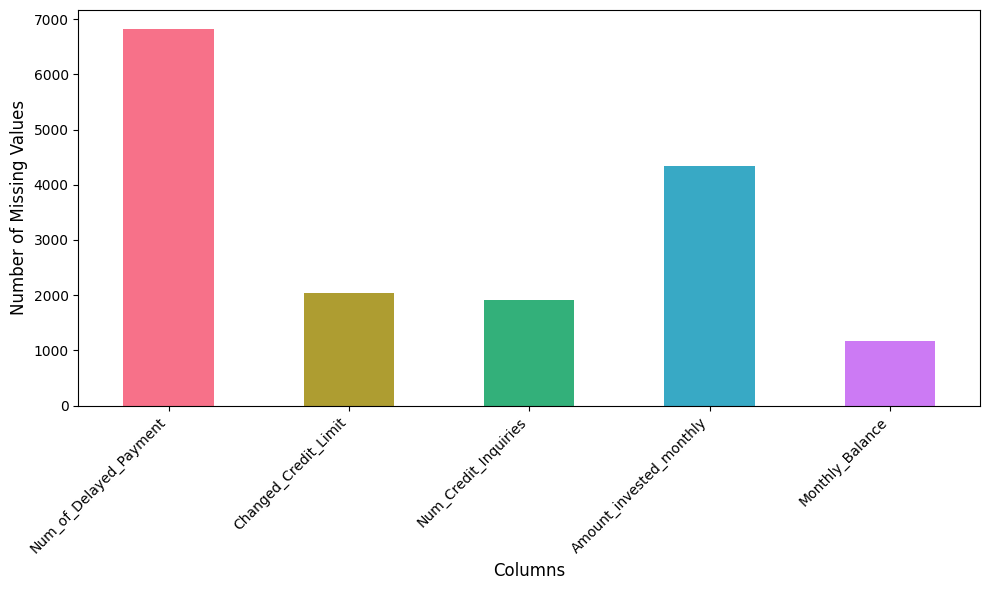

Columns with missing values:
Num_of_Delayed_Payment     6824
Changed_Credit_Limit       2037
Num_Credit_Inquiries       1906
Amount_invested_monthly    4344
Monthly_Balance            1179
dtype: int64


In [ ]:
# Check for missing values in the DataFrame by using isnull() to identify NaN values and sum() to count them per column
missing_values = step_train10.isnull().sum()

# Create a bar plot to visualize the number of missing values per column (only for columns that have missing values)
plt.figure(figsize=(10, 6))  # Set the size of the figure to make the plot more readable
missing_values[missing_values > 0].plot(kind='bar',
                                        # Use seaborn's color palette "husl" for the bar colors, with the number of colors matching the columns with missing values
                                        color=sns.color_palette("husl", len(missing_values[missing_values > 0])))

# Set labels for the x-axis and y-axis with custom font sizes
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)

# Rotate the x-axis labels for better readability, rotating 45 degrees and aligning them to the right
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping and ensure everything fits in the plot
plt.tight_layout()

# Show the plot
plt.show()

# Print the columns that have missing values along with the number of missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])



In [ ]:
# Define a function to handle missing values separately for numeric and categorical columns
def handle_missing_values(df):
    # Identify numeric columns (e.g., integers, floats) and store their names
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Identify categorical columns (non-numeric data types like strings) and store their names
    categorical_columns = df.select_dtypes(exclude=[np.number]).columns

    # Handle missing values in numeric columns
    for col in numeric_columns:
        # Check if there are any missing values in the column
        if df[col].isnull().sum() > 0:
            # Calculate the median of the column and fill missing values with it
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            # Print a message showing which column was filled with its median value
            print(f"Filled {col} with median value: {median_value}")

    # Handle missing values in categorical columns
    for col in categorical_columns:
        # Check if there are any missing values in the column
        if df[col].isnull().sum() > 0:
            # Calculate the mode (most frequent value) and fill missing values with it
            mode_value = df[col].mode()[0]  # mode() returns a Series, so we take the first (most common) value
            df[col].fillna(mode_value, inplace=True)
            # Print a message showing which column was filled with its mode value
            print(f"Filled {col} with mode value: {mode_value}")

    # Return the DataFrame after handling missing values
    return df

# Apply the handle_missing_values function to the DataFrame step_train10
step_train10 = handle_missing_values(step_train10)

# Print the number of missing values after handling them to ensure the operation worked
print("\nMissing values after handling:")
print(step_train10.isnull().sum())

# Display DataFrame info to check data types and non-null counts after handling missing values
print("\nDataFrame Info:")
step_train10.info()


Filled Num_of_Delayed_Payment with median value: 14.0
Filled Changed_Credit_Limit with median value: 9.41
Filled Num_Credit_Inquiries with median value: 6.0
Filled Amount_invested_monthly with median value: 136.0131592766847
Filled Monthly_Balance with median value: 336.6839904415121

Missing values after handling:
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 97224 en

**Handling Outliers**

In [ ]:
# Print summary statistics before handling outliers
print("Summary statistics before handling outliers:")
print(step_train10.describe())

Summary statistics before handling outliers:
                Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
count  97224.000000   9.722400e+04       97224.000000     97224.000000   
mean      33.323274   1.768414e+05          17.128322        22.447503   
std       10.778909   1.432682e+06         117.687075       128.848573   
min       14.000000   7.005930e+03           0.000000         0.000000   
25%       24.000000   1.946292e+04           3.000000         4.000000   
50%       33.000000   3.757918e+04           6.000000         5.000000   
75%       42.000000   7.281540e+04           7.000000         7.000000   
max      100.000000   2.419806e+07        1798.000000      1499.000000   

       Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count   97224.000000  97224.000000         97224.000000   
mean       72.593259     10.713507            21.105653   
std       467.279983     61.375653            14.820635   
min         1.000000      0.000000             0.000

In [ ]:
# Function to categorize columns based on skewness (Highly or Lowly Skewed)
def categorize_skewness_step(df, lower=-0.5, upper=0.5):
    highly_skewed = []  # List to store highly skewed columns
    lowly_skewed = []   # List to store lowly skewed columns

    # Iterate through all columns to check for skewness
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:  # Only check for numeric columns
            col_skewness = skew(df[col].dropna())  # Calculate skewness, ignoring NaN values
            # Classify columns based on skewness value (either highly or lowly skewed)
            if col_skewness <= lower or col_skewness >= upper:
                highly_skewed.append(col)  # Add to highly skewed if beyond thresholds
            else:
                lowly_skewed.append(col)  # Add to lowly skewed if within thresholds

    return highly_skewed, lowly_skewed

# Function to calculate Adjusted Outlyingness (AO) for a given column
def calculate_ao_step(series):
    median = np.median(series)  # Calculate median of the column
    mad = median_abs_deviation(series)  # Calculate Median Absolute Deviation (MAD)

    mc = skew(series)  # Calculate skewness of the column
    # Based on the skewness, calculate upper and lower MAD
    if mc > 0:
        upper_mad = np.median(series[series > median]) - median
        lower_mad = median - np.median(series[series < median])
    else:
        lower_mad = np.median(series[series > median]) - median
        upper_mad = median - np.median(series[series < median])

    # Calculate adjusted outlyingness for each value in the series
    adjusted_outlyingness = np.where(
        series > median,
        (series - median) / upper_mad,
        (median - series) / lower_mad
    )

    return adjusted_outlyingness

# Function to handle outliers in highly skewed columns by replacing them with the median
def replace_outliers_median_step(df, columns, multiplier=1.5):
    # Iterate over each column that is highly skewed
    for col in columns:
        ao = calculate_ao_step(df[col].dropna())  # Calculate AO for the column
        # Define upper and lower bounds based on the interquartile range (IQR)
        upper_bound = np.percentile(ao, 75) + multiplier * (np.percentile(ao, 75) - np.percentile(ao, 25))
        lower_bound = np.percentile(ao, 25) - multiplier * (np.percentile(ao, 75) - np.percentile(ao, 25))
        median = df[col].median()  # Calculate the median of the column
        # Replace values outside the bounds (outliers) with the median
        df[col] = np.where((ao > upper_bound) | (ao < lower_bound), median, df[col])
    return df

# Function to handle outliers in lowly skewed columns by clipping values
def clip_outliers_step(df, columns, multiplier=1.5):
    # Iterate over each column that is lowly skewed
    for col in columns:
        ao = calculate_ao_step(df[col].dropna())  # Calculate AO for the column
        # Define upper and lower bounds based on the interquartile range (IQR)
        upper_bound = np.percentile(ao, 75) + multiplier * (np.percentile(ao, 75) - np.percentile(ao, 25))
        lower_bound = np.percentile(ao, 25) - multiplier * (np.percentile(ao, 75) - np.percentile(ao, 25))
        # Clip outliers to the calculated bounds (replace extreme values with the bounds)
        df[col] = np.where(ao > upper_bound, upper_bound, df[col])
        df[col] = np.where(ao < lower_bound, lower_bound, df[col])
    return df

# Main function to remove outliers in step_train10 with adjusted outlyingness
def remove_outliers_step(df, multiplier=1.5):
    # Identify numeric columns in the DataFrame
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Categorize columns as highly or lowly skewed using skewness
    highly_skewed, lowly_skewed = categorize_skewness_step(df[numeric_cols])

    # Handle outliers by replacing them with the median in highly skewed columns
    df = replace_outliers_median_step(df, highly_skewed, multiplier)

    # Clip outliers in lowly skewed columns using the AO method
    df = clip_outliers_step(df, lowly_skewed, multiplier)

    return df

# Apply the function to step_train10 to remove outliers
step_train10 = remove_outliers_step(step_train10, multiplier=1.5)

# Function to check if outliers have been handled properly
def check_outliers_handled_step(df, columns):
    # Iterate through each numeric column to check for remaining outliers
    for col in columns:
        # Calculate the interquartile range (IQR) and limits
        q1, q3 = np.percentile(df[col].dropna(), [25, 75])
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr

        # Identify any values outside the lower and upper limits (remaining outliers)
        outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)][col]
        # Print if outliers are detected or if the column is clear of outliers
        if not outliers.empty:
            print(f"Outliers detected in column {col}:")
            print(outliers)
        else:
            print(f"No outliers detected in column {col}.")

# Check for any remaining outliers in numeric columns
numeric_cols = step_train10.select_dtypes(include=['number']).columns
check_outliers_handled_step(step_train10, numeric_cols)

# Print the DataFrame information to verify changes and check for non-null values
print(step_train10.info())

# Display the first 10 rows of the DataFrame to inspect changes
print(step_train10.head(10))

# Check for any remaining missing values in each column
print(step_train10.isna().sum())


No outliers detected in column Age.
Outliers detected in column Annual_Income:
1496     135895.96
1497     135895.96
1498     135895.96
1499     135895.96
1500     135895.96
           ...    
98675    137798.88
98676    137798.88
98677    137798.88
98678    137798.88
98679    137798.88
Name: Annual_Income, Length: 340, dtype: float64
No outliers detected in column Num_Bank_Accounts.
No outliers detected in column Num_Credit_Card.
No outliers detected in column Interest_Rate.
No outliers detected in column Num_of_Loan.
Outliers detected in column Delay_from_due_date:
153      51.0
154      48.0
155      51.0
156      51.0
157      51.0
         ... 
99739    49.0
99740    49.0
99742    49.0
99743    49.0
99928    51.0
Name: Delay_from_due_date, Length: 2210, dtype: float64
No outliers detected in column Num_of_Delayed_Payment.
Outliers detected in column Changed_Credit_Limit:
290      27.94
293      27.94
360      27.99
362      27.99
363      27.99
         ...  
97343    28.55
97793 

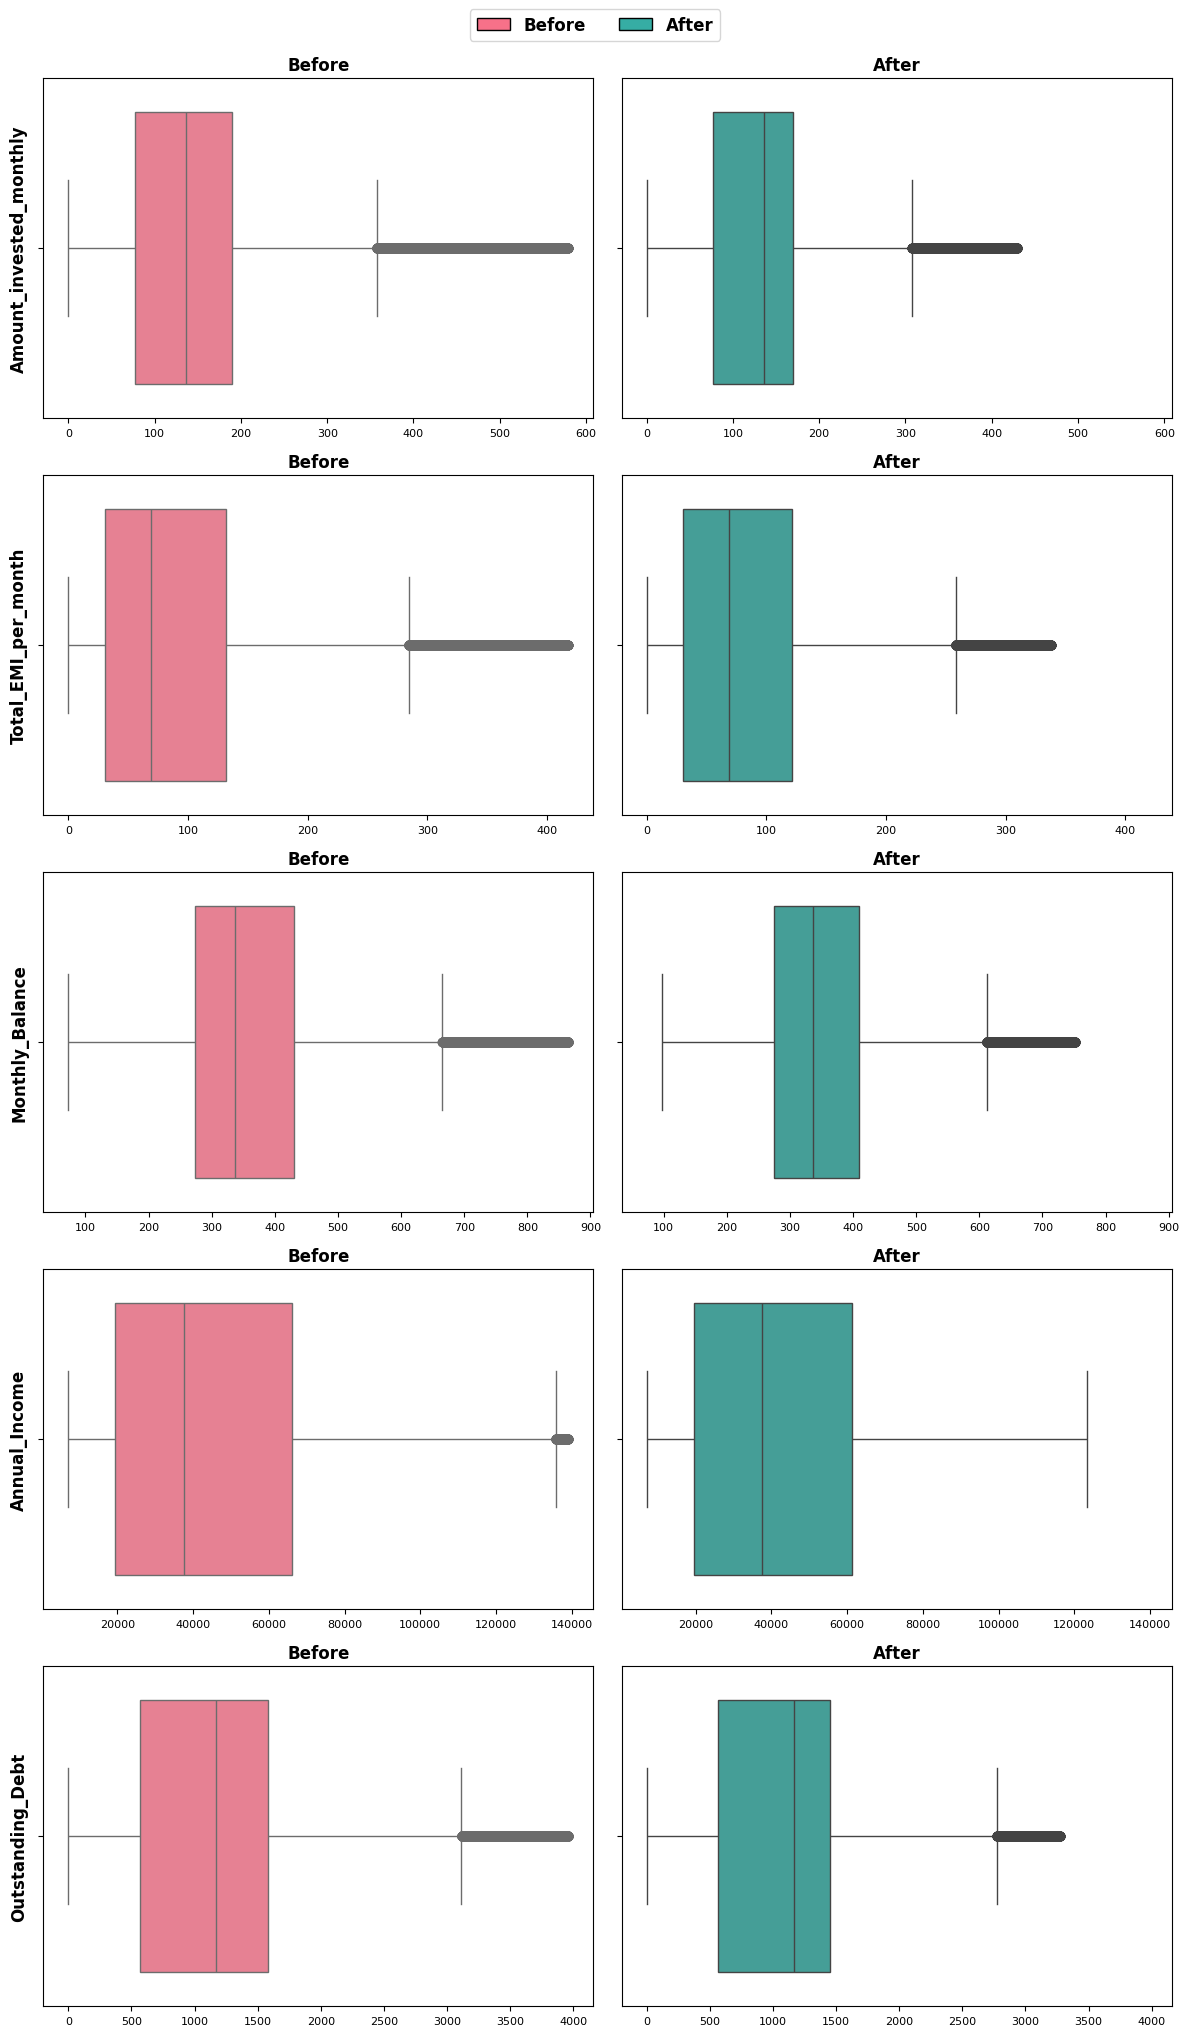


Percentage of data changed: 3.49%
<class 'pandas.core.frame.DataFrame'>
Index: 97224 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       97224 non-null  float64
 1   Occupation                97224 non-null  object 
 2   Annual_Income             97224 non-null  float64
 3   Num_Bank_Accounts         97224 non-null  float64
 4   Num_Credit_Card           97224 non-null  float64
 5   Interest_Rate             97224 non-null  float64
 6   Num_of_Loan               97224 non-null  float64
 7   Delay_from_due_date       97224 non-null  float64
 8   Num_of_Delayed_Payment    97224 non-null  float64
 9   Changed_Credit_Limit      97224 non-null  float64
 10  Num_Credit_Inquiries      97224 non-null  float64
 11  Credit_Mix                97224 non-null  object 
 12  Outstanding_Debt          97224 non-null  float64
 13  Credit_Utilization_Ratio  97224

In [ ]:
def compare_outliers(df, n_cols=5):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    # If there are more than n_cols, select the top n_cols based on skewness
    if len(numeric_cols) > n_cols:
        skewness = df[numeric_cols].apply(lambda x: abs(skew(x.dropna())))
        numeric_cols = skewness.nlargest(n_cols).index
    # Store the original data
    original_data = {col: df[col].copy() for col in numeric_cols}

    # Apply the outlier handling function
    df = remove_outliers_step(df, multiplier=1.5)

    # Set up the plot with adjusted figure size
    fig, axs = plt.subplots(len(numeric_cols), 2, figsize=(12, 4*len(numeric_cols)))

    # Color palette
    colors = sns.color_palette("husl", 2)

    # Set global font properties
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.weight'] = 'bold'

    for i, col in enumerate(numeric_cols):
        # Before outlier handling
        sns.boxplot(x=original_data[col], ax=axs[i, 0], color=colors[0])
        axs[i, 0].set_ylabel(col, fontsize=12, fontweight='bold')
        axs[i, 0].set_xlabel('')
        axs[i, 0].set_title('Before', fontsize=12, fontweight='bold')

        # After outlier handling
        sns.boxplot(x=df[col], ax=axs[i, 1], color=colors[1])
        axs[i, 1].set_ylabel('')
        axs[i, 1].set_xlabel('')
        axs[i, 1].set_title('After', fontsize=12, fontweight='bold')

        # Synchronize x-axis limits for before and after plots
        x_min = min(axs[i, 0].get_xlim()[0], axs[i, 1].get_xlim()[0])
        x_max = max(axs[i, 0].get_xlim()[1], axs[i, 1].get_xlim()[1])
        axs[i, 0].set_xlim(x_min, x_max)
        axs[i, 1].set_xlim(x_min, x_max)

        # Adjust tick label font size
        axs[i, 0].tick_params(axis='both', which='major', labelsize=8)
        axs[i, 1].tick_params(axis='both', which='major', labelsize=8)

    # Create legend patches
    legend_elements = [Patch(facecolor=colors[0], edgecolor='black', label='Before'),
                       Patch(facecolor=colors[1], edgecolor='black', label='After')]

    # Add a legend with adjusted font size
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=12)
    plt.tight_layout()
    plt.show()

    # Calculate and print the percentage of data changed
    total_elements = df.shape[0] * len(numeric_cols)
    changed_elements = sum(np.sum(original_data[col] != df[col]) for col in numeric_cols)
    percent_changed = (changed_elements / total_elements) * 100
    print(f"\nPercentage of data changed: {percent_changed:.2f}%")

    return df

# Apply the outlier handling and comparison to step_train10
step_train10 = compare_outliers(step_train10)

# Print info to verify changes
print(step_train10.info())

# Display a few rows to check the results
print(step_train10.head(10))

# Check the number of NaN values in each column
print(step_train10.isna().sum())


**Class Distribution**

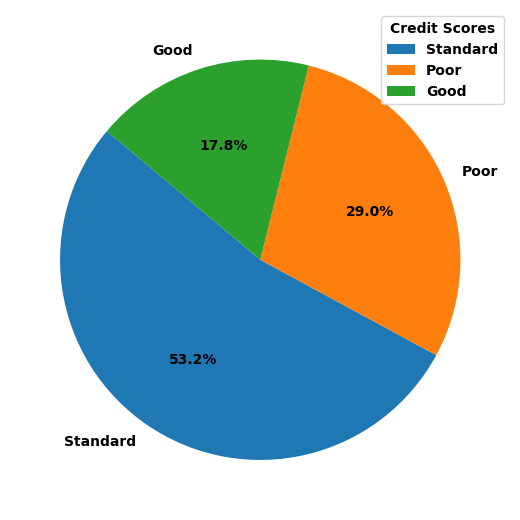

In [ ]:
# Creating a pie chart to see the distribution of 'Credit_Score'
credit_score_counts = step_train10['Credit_Score'].value_counts()  # Get the count of each unique 'Credit_Score' value

# Set the figure size for the pie chart
plt.figure(figsize=(6.5, 6.5))

# Create the pie chart
patches, texts, autotexts = plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%', startangle=140)

# Adding a legend to the chart
plt.legend(patches, credit_score_counts.index, title="Credit Scores", loc="best")

# Display the pie chart
plt.show()


In [ ]:
# List of categorical columns for which we want to get value counts
categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Loop through each column in the list of categorical columns
for col in categorical_cols:
    # Print the name of the current column for clarity
    print(f"\nValue counts for {col}:")

    # Use value_counts() to get the frequency of each unique value in the column
    # normalize=True returns the relative frequency (percentage) instead of the absolute count
    print(step_train10[col].value_counts(normalize=True))




Value counts for Occupation:
Occupation
Unknown          0.070692
Lawyer           0.065714
Architect        0.063513
Engineer         0.063482
Scientist        0.062875
Accountant       0.062845
Mechanic         0.062731
Media_Manager    0.062413
Teacher          0.062217
Developer        0.062032
Entrepreneur     0.061867
Doctor           0.060849
Journalist       0.060746
Manager          0.059728
Musician         0.059245
Writer           0.059049
Name: proportion, dtype: float64

Value counts for Credit_Mix:
Credit_Mix
Standard    0.567247
Good        0.242882
Bad         0.189871
Name: proportion, dtype: float64

Value counts for Payment_of_Min_Amount:
Payment_of_Min_Amount
Yes    0.523646
No     0.476354
Name: proportion, dtype: float64

Value counts for Payment_Behaviour:
Payment_Behaviour
Low_spent_Small_value_payments      0.331359
High_spent_Medium_value_payments    0.175265
Low_spent_Medium_value_payments     0.138597
High_spent_Large_value_payments     0.137127
High_spent

**Correlation Matrix**

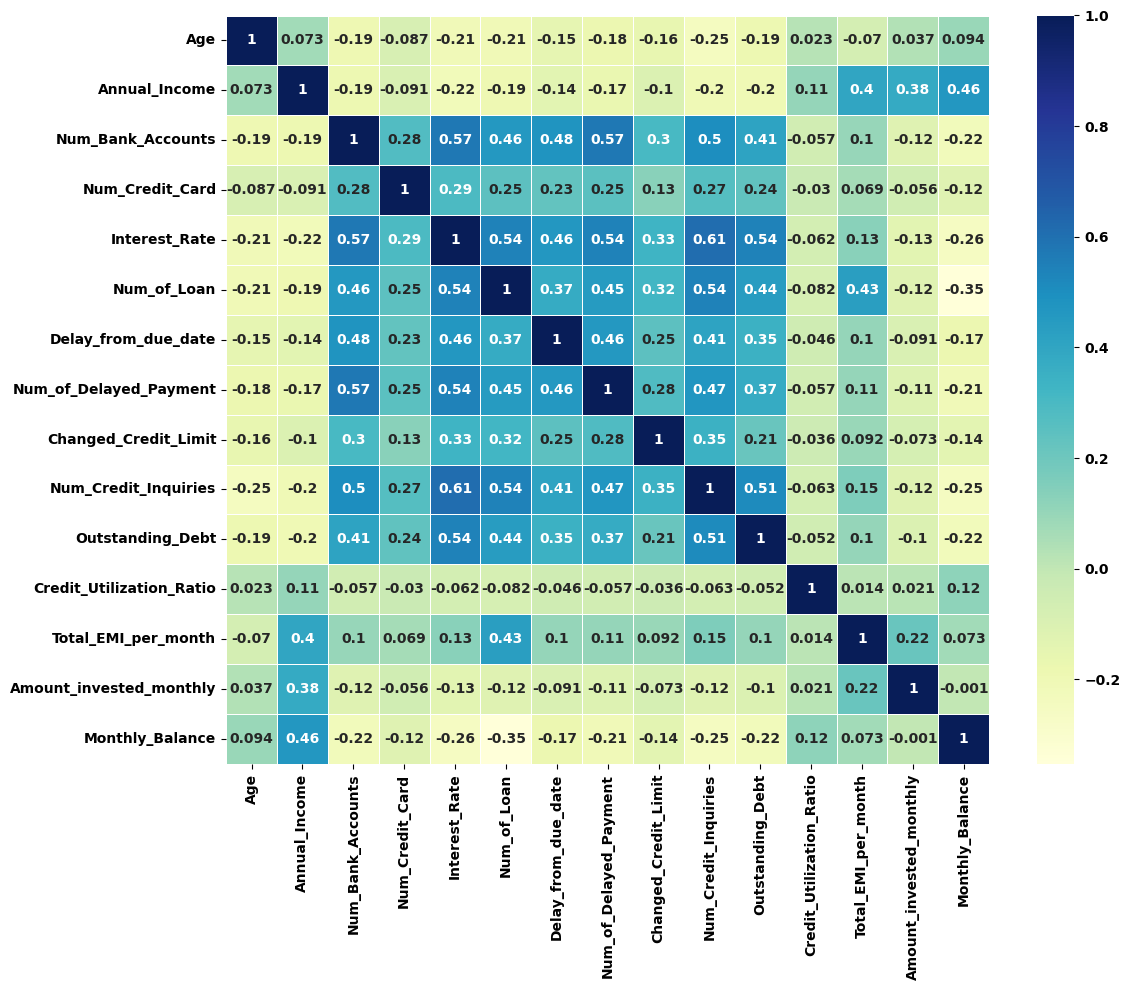

In [ ]:

# Selecting only numeric columns from the DataFrame
numeric_cols = step_train10.select_dtypes(include=[np.number]).columns

# Calculating the correlation matrix
correlation_matrix = step_train10[numeric_cols].corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)  # Generate the heatmap
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


**Bivariate Analysis**

<ipython-input-32-99e8d4152b55>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Credit_Score', y=col, data=step_train10, palette=colors, cut=0, inner="box", width=0.8)  # Violin plot
<ipython-input-32-99e8d4152b55>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Credit_Score', y=col, data=step_train10, palette=colors, cut=0, inner="box", width=0.8)  # Violin plot
<ipython-input-32-99e8d4152b55>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Credit_Score', y=col, data=step_train10, palette=colors, cut=0, inner="box", 

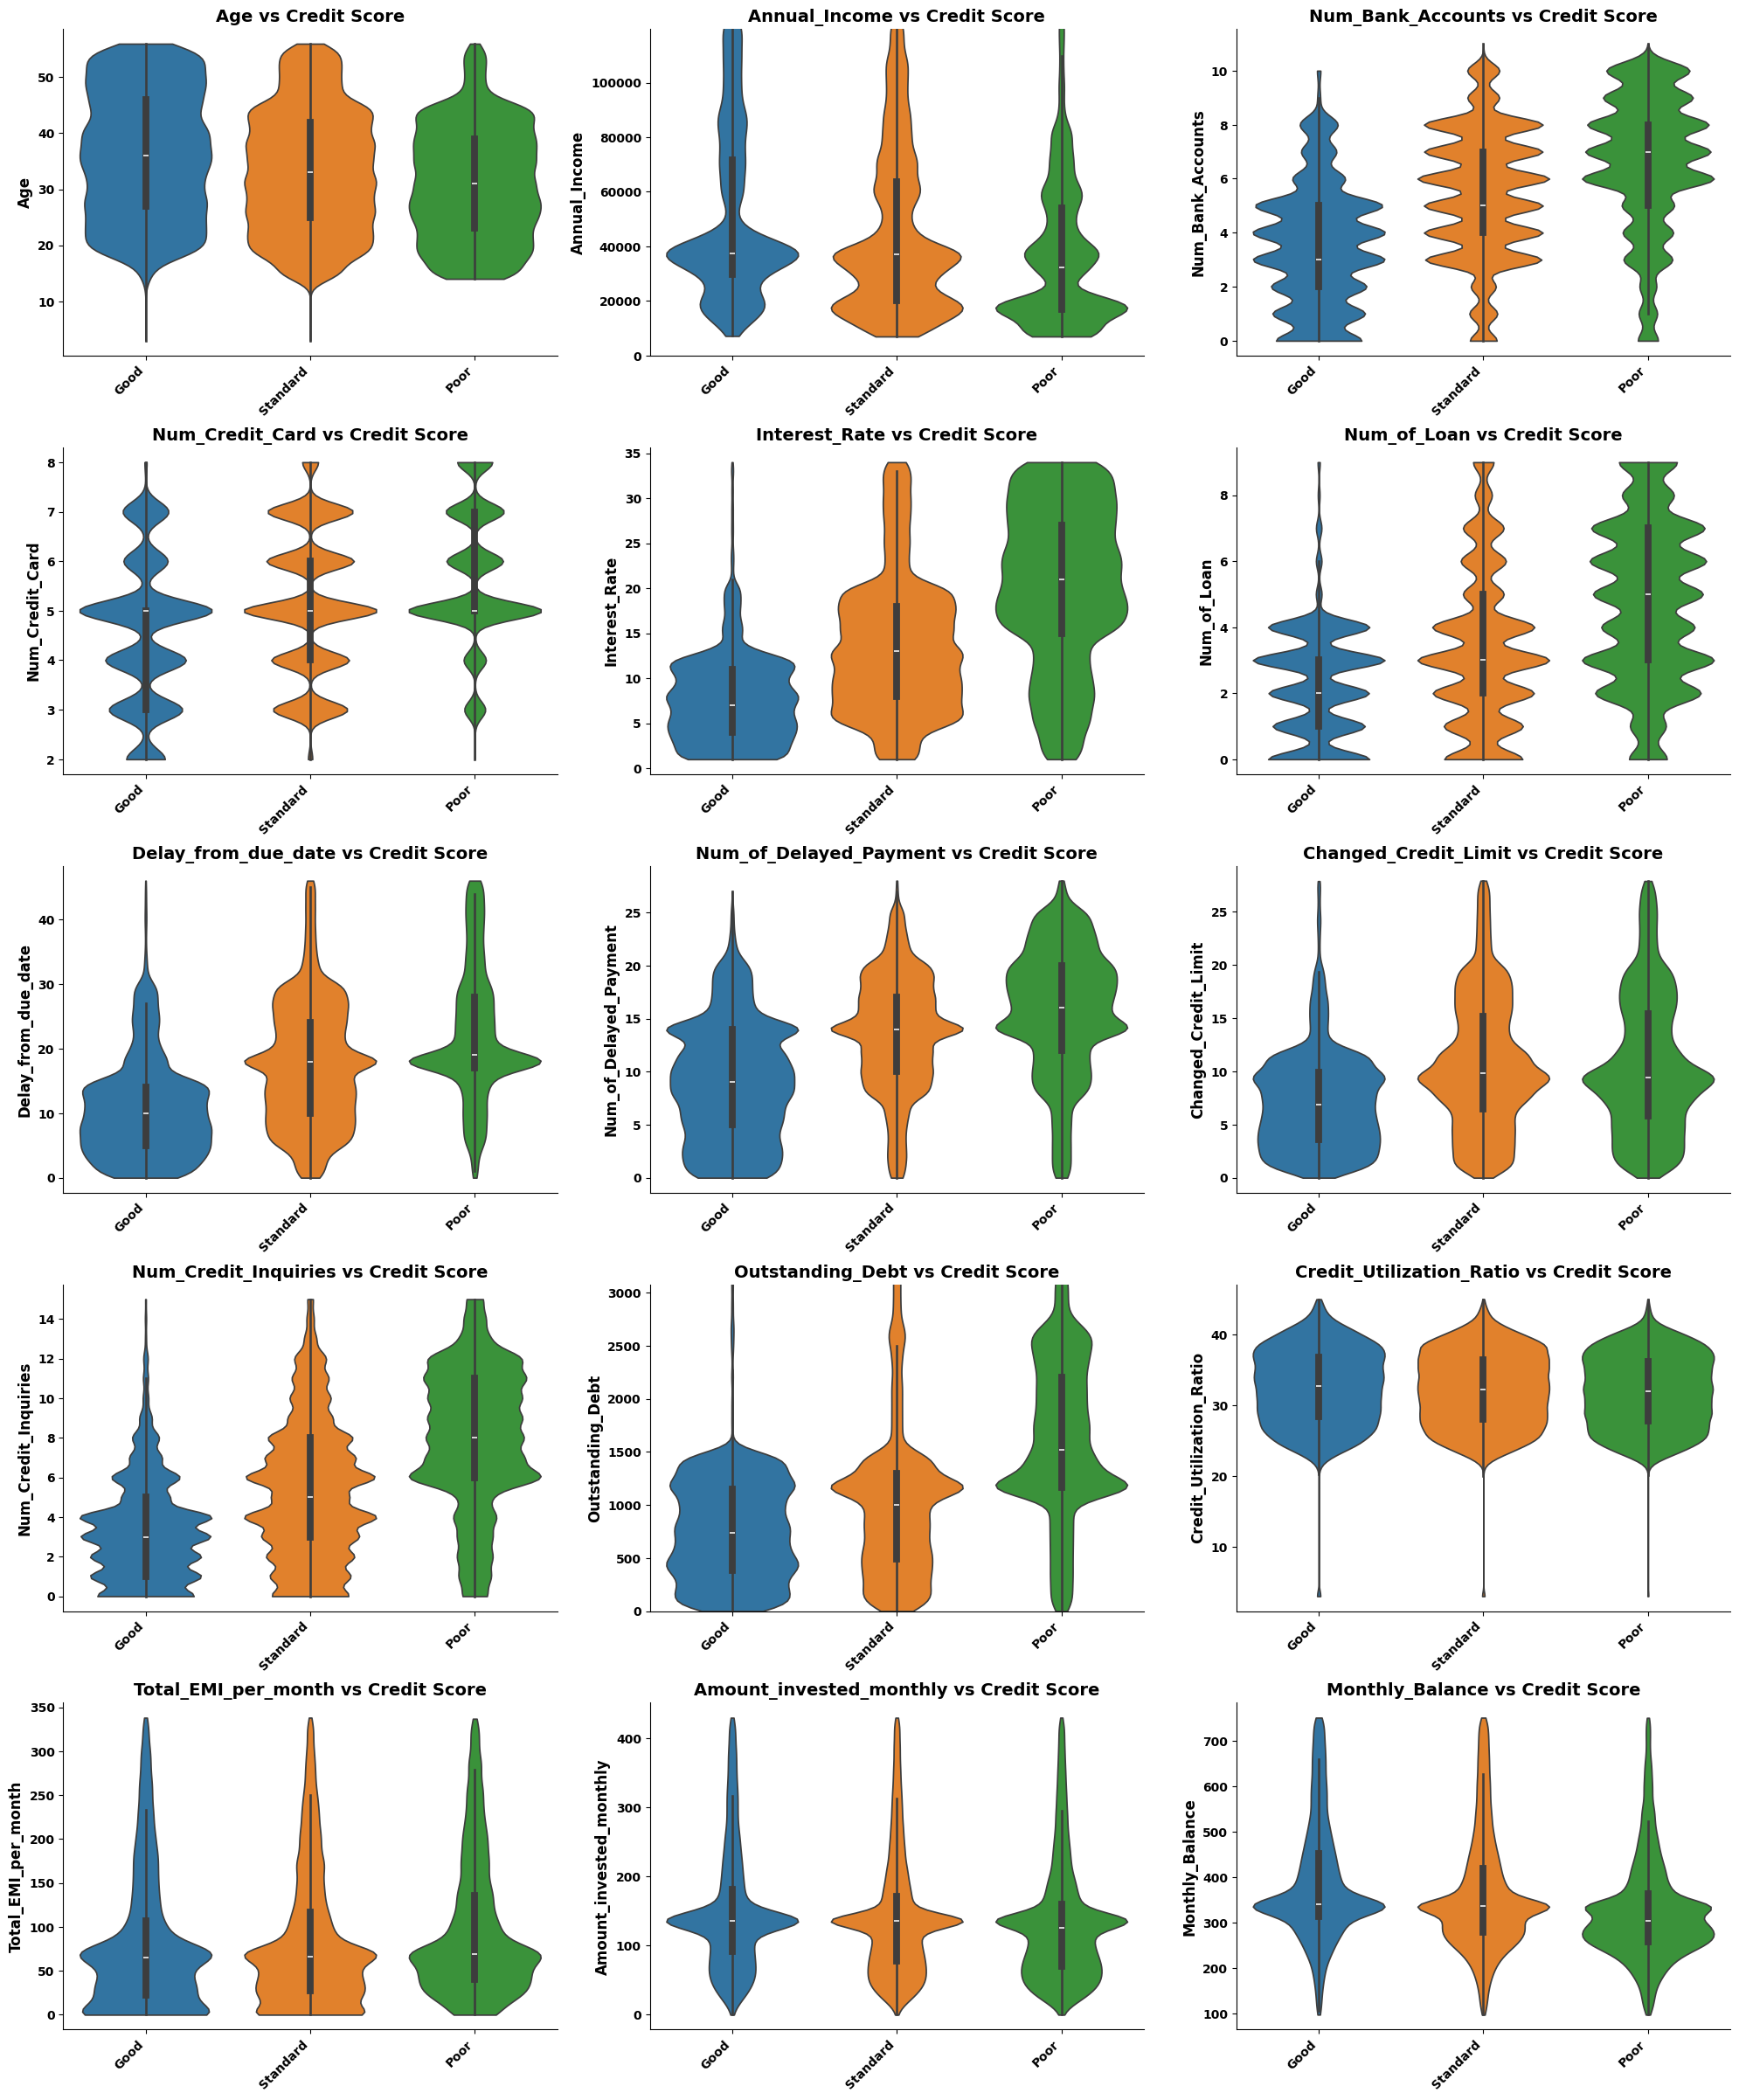

In [ ]:
# Get numerical columns (excluding 'Credit_Score')
numeric_cols = [col for col in step_train10.select_dtypes(include=['int64', 'float64']).columns if col != 'Credit_Score']

# Calculate the number of rows needed for subplots
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Set up the matplotlib figure size
plt.figure(figsize=(20, 5*n_rows))

# Define color palette for the plots
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Loop through each numeric column and create violin plots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each plot
    sns.violinplot(x='Credit_Score', y=col, data=step_train10, palette=colors, cut=0, inner="box", width=0.8)  # Violin plot

    # Set bold title and labels
    plt.title(f'{col} vs Credit Score', fontsize=14, fontweight='bold')
    plt.xlabel('', fontsize=12, fontweight='bold')
    plt.ylabel(col, fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')  # Rotate x-axis labels
    plt.yticks(fontsize=10, fontweight='bold')

    # Adjust y-axis for specific columns to enhance readability
    if col in ['Annual_Income', 'Outstanding_Debt']:
        plt.ylim(0, step_train10[col].quantile(0.99))

    # Remove top and right spines from the plot for a cleaner look
    sns.despine()

# Adjust the layout to ensure everything fits well
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()  # Display the plots


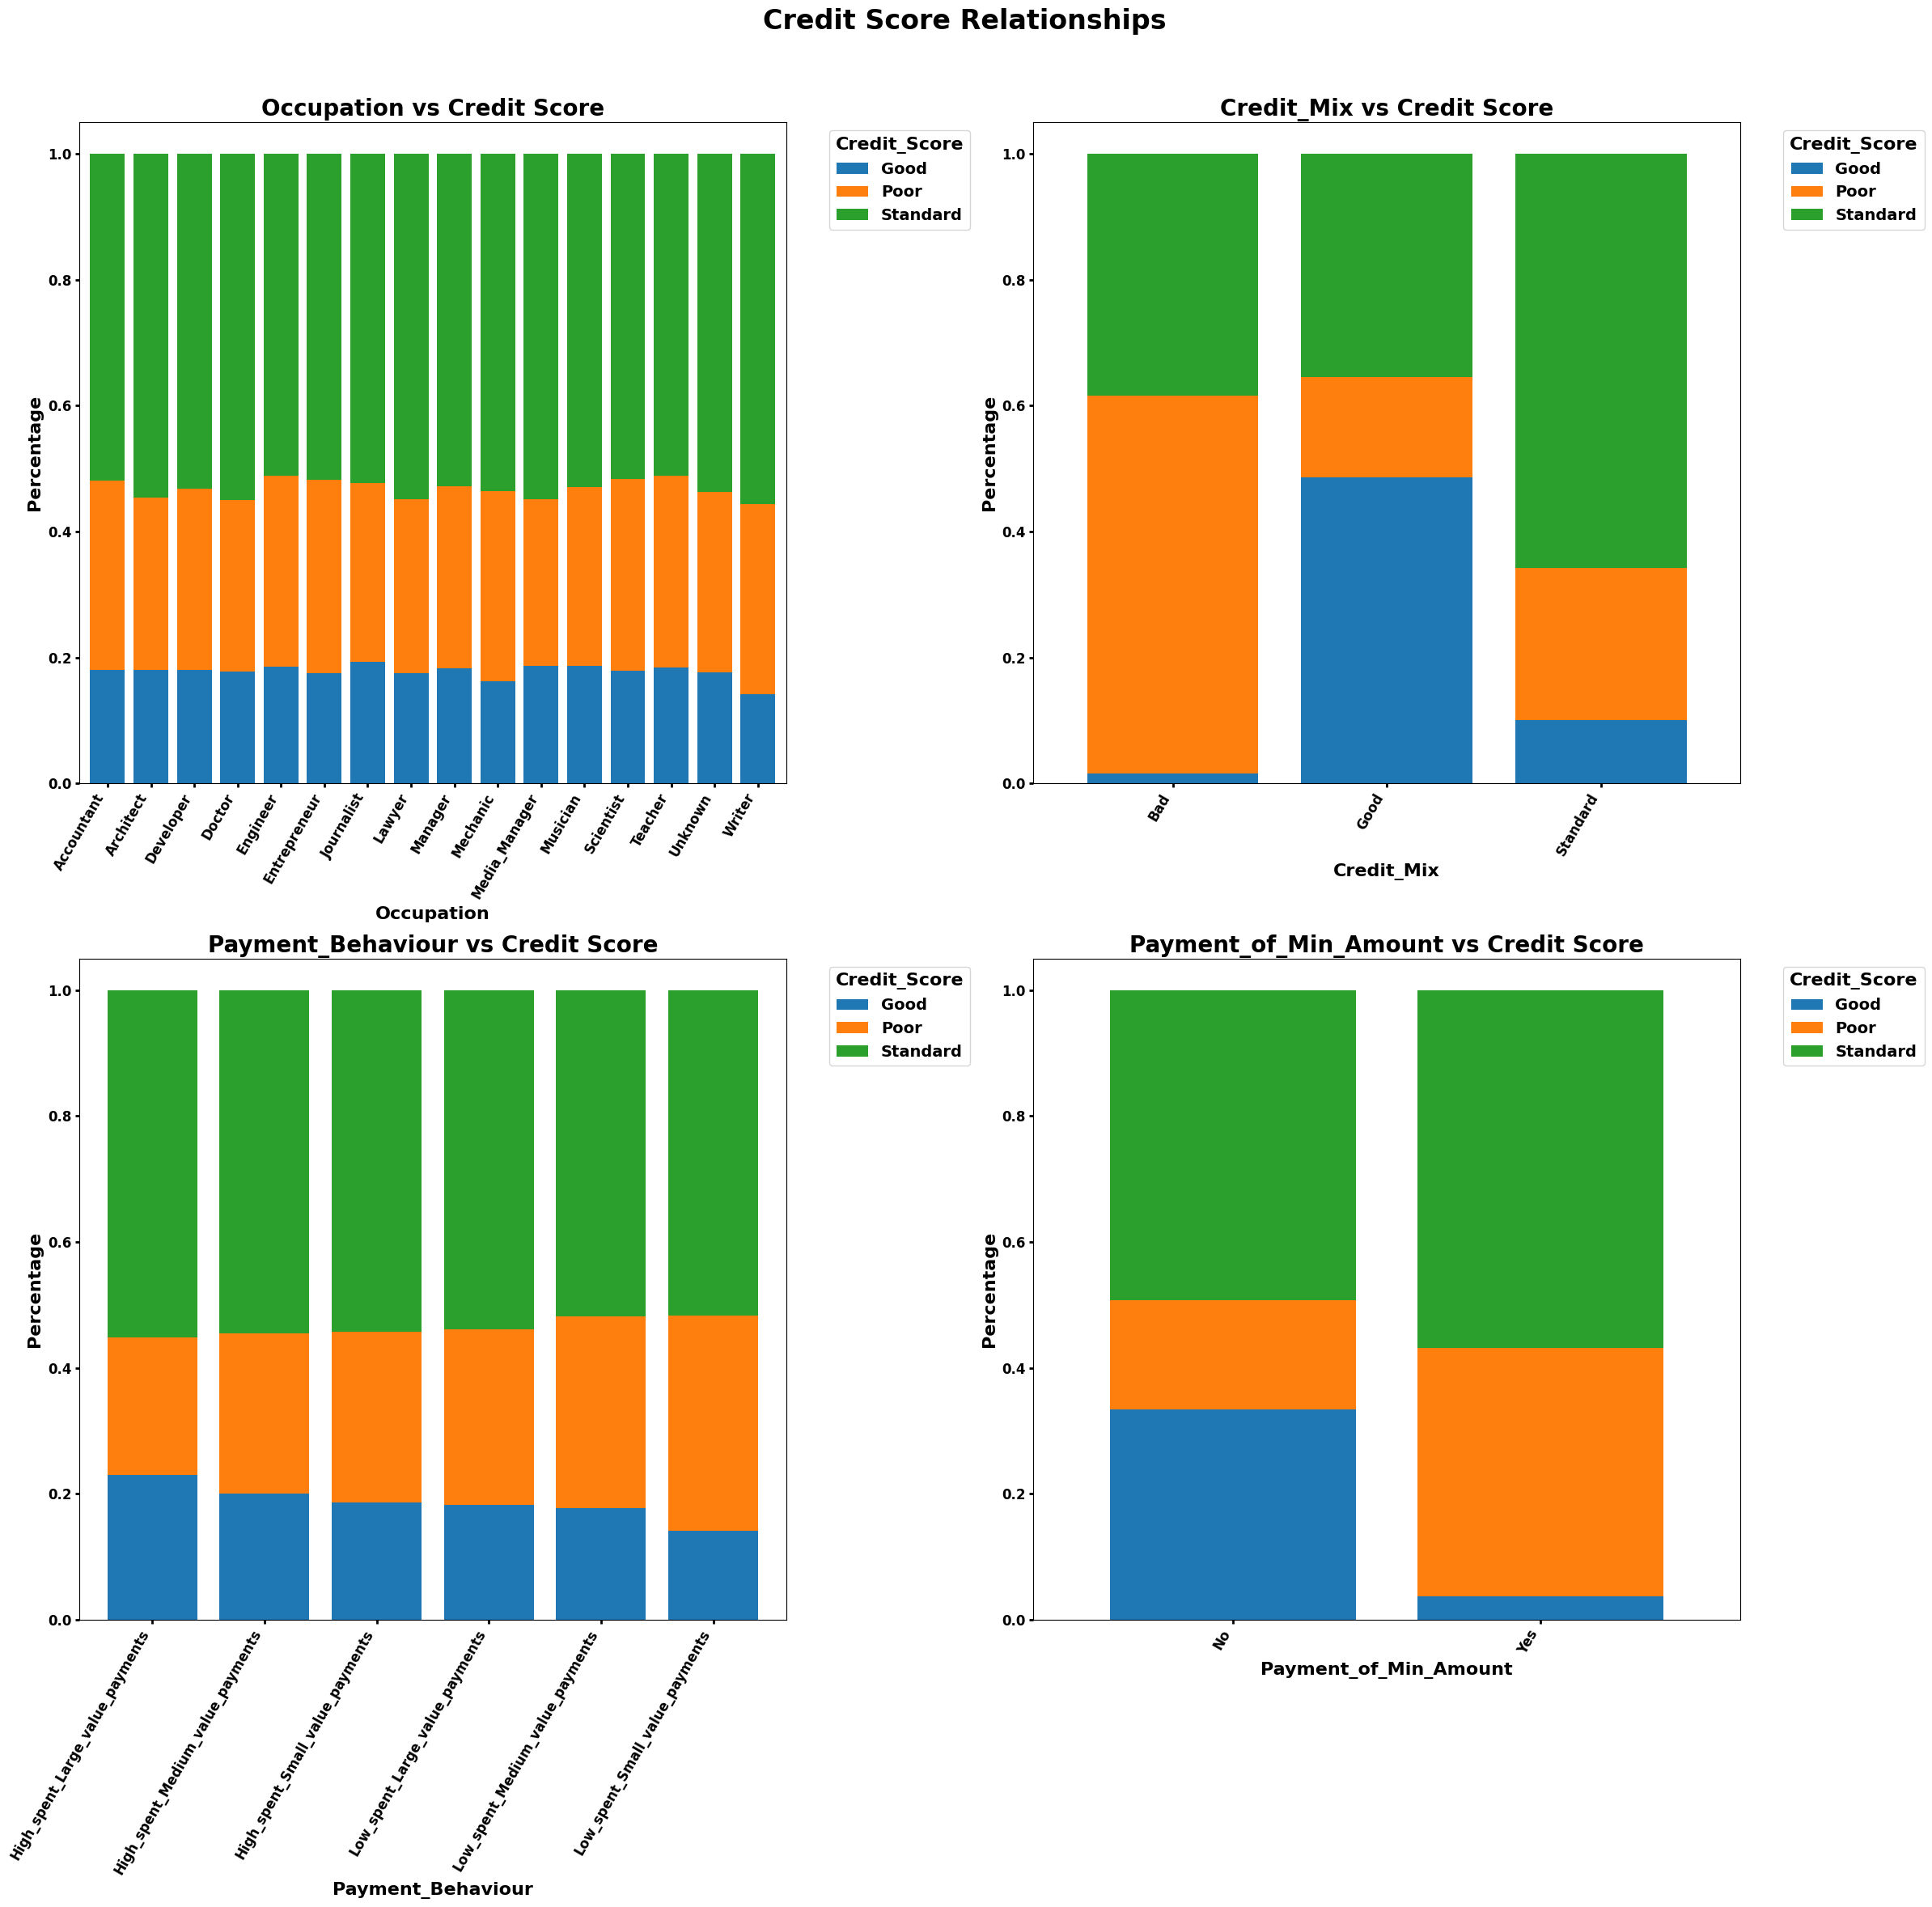

In [ ]:
# Set up the subplot grid with 2x2 configuration
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
fig.suptitle('Credit Score Relationships', fontsize=24, fontweight='bold')  # Add main title

# List of features to plot against 'Credit_Score'
features = ['Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']

# Custom color palette for the stacked bar plots
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Function to create stacked bar plots
def create_stacked_bar(data, feature, ax):
    # Calculate percentage for each Credit_Score category within the feature
    df_perc = data.groupby(feature)['Credit_Score'].value_counts(normalize=True).unstack()

    # Use custom colors for the stacked bars
    custom_colors = sns.color_palette(colors, n_colors=len(df_perc.columns))

    # Plot stacked bar chart
    df_perc.plot(kind='bar', stacked=True, width=0.8, color=custom_colors, ax=ax)

    # Set title, axis labels, and adjust text sizes
    ax.set_title(f'{feature} vs Credit Score', fontsize=20, fontweight='bold')
    ax.set_xlabel(feature, fontsize=16, fontweight='bold')
    ax.set_ylabel('Percentage', fontsize=16, fontweight='bold')

    # Customize the legend for better readability
    ax.legend(title='Credit_Score', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

    # Adjust x-axis and y-axis tick labels and their sizes
    ax.tick_params(axis='x', rotation=60, labelsize=12, width=2)  # Rotate x-axis labels for readability
    ax.tick_params(axis='y', labelsize=12, width=2)

    # Adjust horizontal alignment of the x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

# Loop through features and create subplots for each feature vs 'Credit_Score'
for i, feature in enumerate(features):
    create_stacked_bar(step_train10, feature, axs[i // 2, i % 2])  # Position the subplot in the 2x2 grid

# Adjust layout to prevent overlap and leave space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()  # Display the plots


**Feature Creation**

<ipython-input-34-5371238a0262>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Debt_to_Income_Ratio', data=df, ax=ax1, palette=palette)
<ipython-input-34-5371238a0262>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Credit_Utilization_Trend', data=df, ax=ax2, palette=palette)


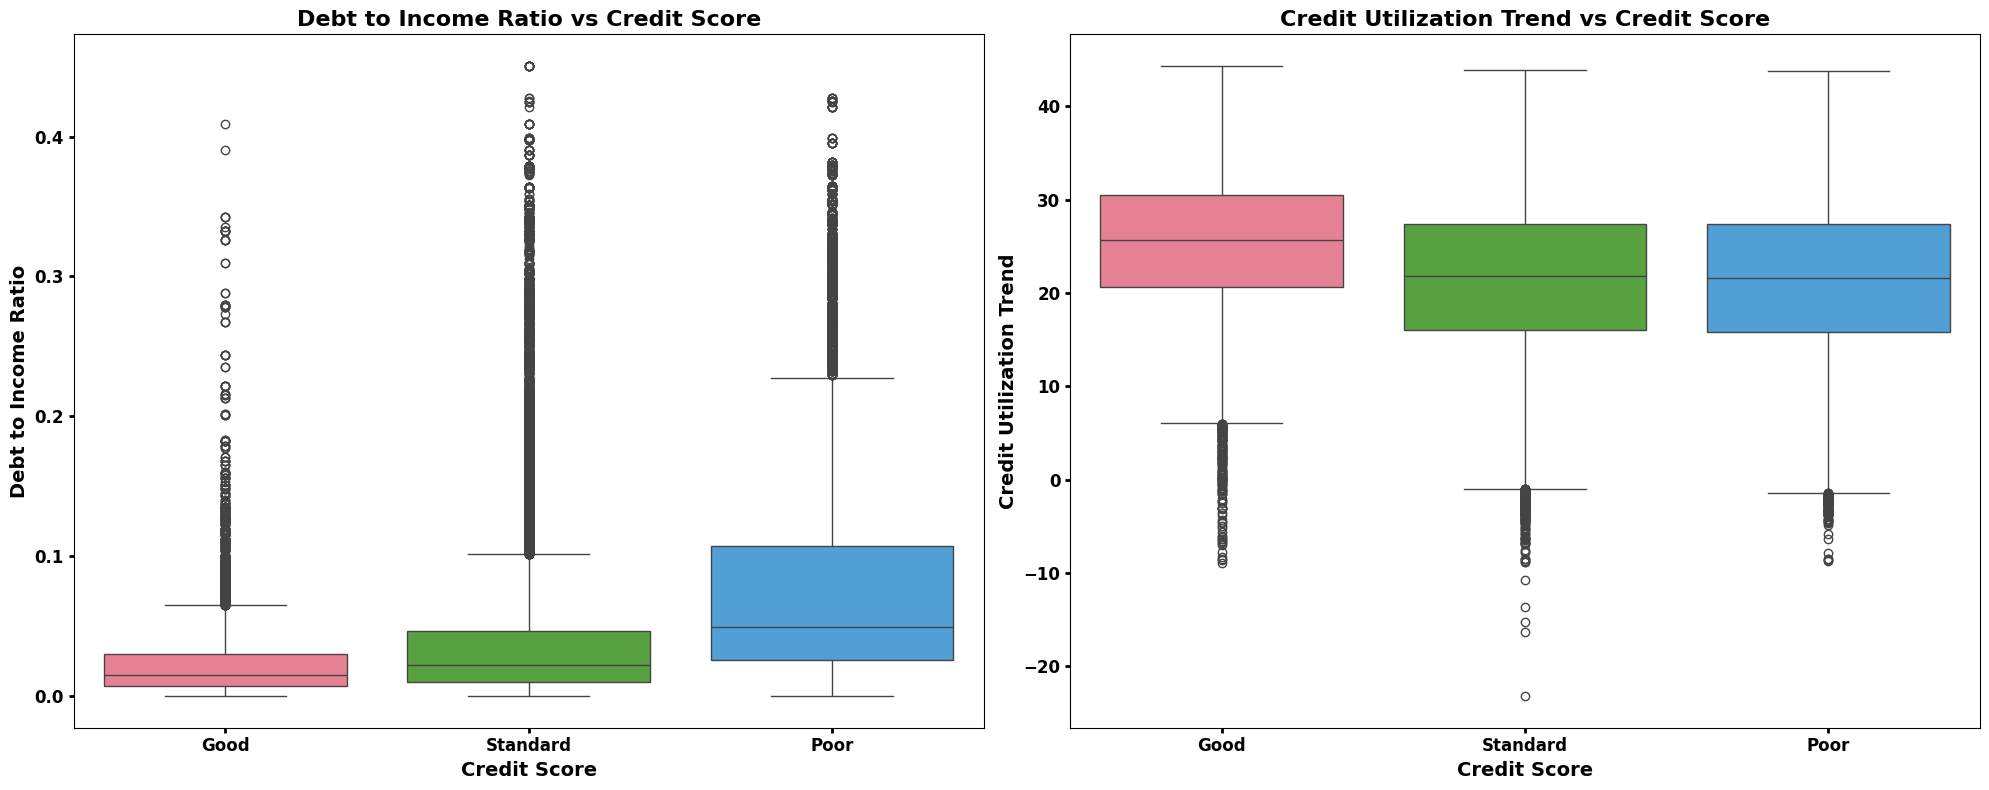

In [ ]:

# Function to create new features: Debt-to-Income Ratio and Credit Utilization Trend
def create_new_features(df):
    # 1. Debt-to-Income Ratio (DTI)
    df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']
    # 2. Credit Utilization Trend
    df['Credit_Utilization_Trend'] = df['Credit_Utilization_Ratio'] - df['Changed_Credit_Limit']
    return df

# Apply the new features to the DataFrame
step_train11 = create_new_features(step_train10)

# Function to plot the new features vs Credit Score
def plot_features_vs_credit_score(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # Create a 1x2 subplot

    # Define a color palette
    palette = sns.color_palette("husl", 3)

    # Plot Debt-to-Income Ratio vs Credit Score
    sns.boxplot(x='Credit_Score', y='Debt_to_Income_Ratio', data=df, ax=ax1, palette=palette)
    ax1.set_title('Debt to Income Ratio vs Credit Score', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Credit Score', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Debt to Income Ratio', fontsize=14, fontweight='bold')
    ax1.tick_params(axis='x', labelsize=12, width=2)
    ax1.tick_params(axis='y', labelsize=12, width=2)

    # Plot Credit Utilization Trend vs Credit Score
    sns.boxplot(x='Credit_Score', y='Credit_Utilization_Trend', data=df, ax=ax2, palette=palette)
    ax2.set_title('Credit Utilization Trend vs Credit Score', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Credit Score', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Credit Utilization Trend', fontsize=14, fontweight='bold')
    ax2.tick_params(axis='x', labelsize=12, width=2)
    ax2.tick_params(axis='y', labelsize=12, width=2)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Plot the new features against Credit Score
plot_features_vs_credit_score(step_train11)


**Encoding**

In [ ]:

# Step 1: Identify unique values
unique_credit_score = step_train10['Credit_Score'].unique()
unique_credit_mix = step_train10['Credit_Mix'].unique()
unique_payment_min_amount = step_train10['Payment_of_Min_Amount'].unique()

# Print unique values for verification
print("Unique values in Credit_Score:", unique_credit_score)
print("Unique values in Credit_Mix:", unique_credit_mix)
print("Unique values in Payment_of_Min_Amount:", unique_payment_min_amount)

# Step 2: Create mappings
credit_score_mapping = {value: idx for idx, value in enumerate(unique_credit_score)}
credit_mix_mapping = {value: idx for idx, value in enumerate(unique_credit_mix)}
payment_min_amount_mapping = {value: idx for idx, value in enumerate(unique_payment_min_amount)}

# Print mappings for verification
print("Credit_Score mapping:", credit_score_mapping)
print("Credit_Mix mapping:", credit_mix_mapping)
print("Payment_of_Min_Amount mapping:", payment_min_amount_mapping)

# Step 3: Apply mappings directly to the original columns
step_train10['Credit_Score'] = step_train10['Credit_Score'].map(credit_score_mapping)
step_train10['Credit_Mix'] = step_train10['Credit_Mix'].map(credit_mix_mapping)
step_train10['Payment_of_Min_Amount'] = step_train10['Payment_of_Min_Amount'].map(payment_min_amount_mapping)

# Verify the updated columns
print(step_train10[['Credit_Score', 'Credit_Mix', 'Payment_of_Min_Amount']].head())


Unique values in Credit_Score: ['Good' 'Standard' 'Poor']
Unique values in Credit_Mix: ['Standard' 'Good' 'Bad']
Unique values in Payment_of_Min_Amount: ['No' 'Yes']
Credit_Score mapping: {'Good': 0, 'Standard': 1, 'Poor': 2}
Credit_Mix mapping: {'Standard': 0, 'Good': 1, 'Bad': 2}
Payment_of_Min_Amount mapping: {'No': 0, 'Yes': 1}
   Credit_Score  Credit_Mix  Payment_of_Min_Amount
0             0           0                      0
1             0           1                      0
3             0           1                      0
4             0           1                      0
5             0           1                      0


In [ ]:

# Apply One-Hot Encoding for Occupation and Payment_Behaviour
step_train10 = pd.get_dummies(step_train10, columns=['Occupation', 'Payment_Behaviour'])

# Verify columns after one-hot encoding
print("Column names after one-hot encoding:", step_train10.columns)
print(step_train10.head())


Column names after one-hot encoding: Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Credit_Utilization_Trend',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Unknown', 'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Beha

In [ ]:
steptrain10_imbal = step_train10.copy()
step_train10_smote =  step_train10.copy()
steptrain10_balanced = step_train10.copy()
step_train10_undersamp = step_train10.copy()

**Imbalance dataset's model building**

In [ ]:
# Step 1: Drop the Credit_Score column
X_imbal = steptrain10_imbal.drop('Credit_Score', axis=1)
y_imbal = steptrain10_imbal['Credit_Score']

In [ ]:
# Step 2: Split the data into training and testing sets with stratify, 20% test size
X_train_imbal, X_test_imbal, y_train_imbal, y_test_imbal = train_test_split(X_imbal, y_imbal, test_size=0.2, random_state=42, stratify=y_imbal)

# Print the shapes of the resulting datasets
print("Shape of X_train_imbal:", X_train_imbal.shape)
print("Shape of X_test_imbal:", X_test_imbal.shape)
print("Shape of y_train_imbal:", y_train_imbal.shape)
print("Shape of y_test_imbal:", y_test_imbal.shape)

# Verify the class distribution in the training set
print("\nClass distribution in y_train_imbal:")
print(y_train_imbal.value_counts())

Shape of X_train_imbal: (77779, 41)
Shape of X_test_imbal: (19445, 41)
Shape of y_train_imbal: (77779,)
Shape of y_test_imbal: (19445,)

Class distribution in y_train_imbal:
Credit_Score
1    41379
2    22564
0    13836
Name: count, dtype: int64


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_imbal)
X_test_scaled = scaler.transform(X_test_imbal)

In [ ]:


def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # Create a custom colormap
    colors = ['#f0f0f0', '#c8b4d8', '#a07cd5', '#7b52ab', '#5c3a8c']
    n_bins = len(colors)
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_purple', colors, N=n_bins)

    plt.figure(figsize=(10, 8))

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                cbar_kws={'label': 'Count'})

    # Set x and y labels with increased font size and bold
    plt.xlabel('Predicted', fontsize=16, fontweight='bold')
    plt.ylabel('Actual', fontsize=16, fontweight='bold')

    # Increase font size of tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Increase font size of annotation (confusion matrix values)
    for text in plt.gca().texts:
        text.set_fontsize(12)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [ ]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Record the start time and train the model
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time  # Calculate training time

    # Record the start time and test the model
    start_time = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_time  # Calculate testing time

    # Calculate evaluation metrics
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred, average='weighted'), 2)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 2)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"Training Time: {train_time:.2f} seconds")
    print(f"Testing Time: {test_time:.2f} seconds")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred)  # Ensure this function is defined elsewhere

    return model, accuracy, train_time, test_time  # Return the model and evaluation results



In [ ]:
def plot_roc_curves(results, X_test, y_test):
    plt.figure(figsize=(10, 8))
    # Ensure y_test is a 1D array
    y_test = np.array(y_test).ravel()
    # Get unique classes
    classes = np.unique(y_test)
    n_classes = len(classes)
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=classes)
    # Compute class weights
    class_weights = np.bincount(y_test) / len(y_test)

    for name, result in results.items():
        model = result['model']
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            # For models that don't have predict_proba
            y_score = model.decision_function(X_test)

        if y_score.ndim == 1: # if binary classification
            y_score = np.column_stack((1-y_score, y_score))

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute weighted-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]) * class_weights[i]
        weighted_auc = auc(all_fpr, mean_tpr)

        # Print AUROC scores
        print(f"\nAUROC Scores for {name}:")
        for i in range(n_classes):
            print(f"Class {classes[i]}: {roc_auc[i]:.4f}")
        print(f"Weighted Average: {weighted_auc:.4f}")

        plt.plot(all_fpr, mean_tpr,
                 label=f'{name} (Weighted AUC = {weighted_auc:.2f})',
                 linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontweight='bold', fontsize=14)
    plt.ylabel('True Positive Rate', fontweight='bold', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontweight='bold', fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

In [ ]:
# Function to return a dictionary of different models
def get_models():
    models = {
        "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42, n_jobs=-1),  # Bagging with Decision Trees
        "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),  # Extra Trees Classifier
        "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),  # K-Nearest Neighbors
        "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)  # Multi-layer Perceptron (Neural Network)
    }
    return models  # Return the dictionary of models



In [ ]:
# Function to train and evaluate multiple models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()  # Retrieve models from the get_models function
    results = {}  # Dictionary to store the results for each model

    # Loop through each model in the models dictionary
    for name, model in models.items():
        print(f"\nTraining and evaluating {name}...")  # Print which model is being trained and evaluated
        # Train and evaluate the model using the train_and_evaluate_model function
        trained_model, accuracy, train_time, test_time = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

        # Store the results (trained model, accuracy, training time, and testing time) in the dictionary
        results[name] = {
            'model': trained_model,
            'accuracy': accuracy,
            'train_time': train_time,
            'test_time': test_time
        }

    return results  # Return the results dictionary with all model performances



Training and evaluating Bagging...
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-Score: 0.78
Training Time: 193.36 seconds
Testing Time: 2.48 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      3459
           1       0.80      0.80      0.80     10345
           2       0.77      0.79      0.78      5641

    accuracy                           0.78     19445
   macro avg       0.76      0.76      0.76     19445
weighted avg       0.78      0.78      0.78     19445



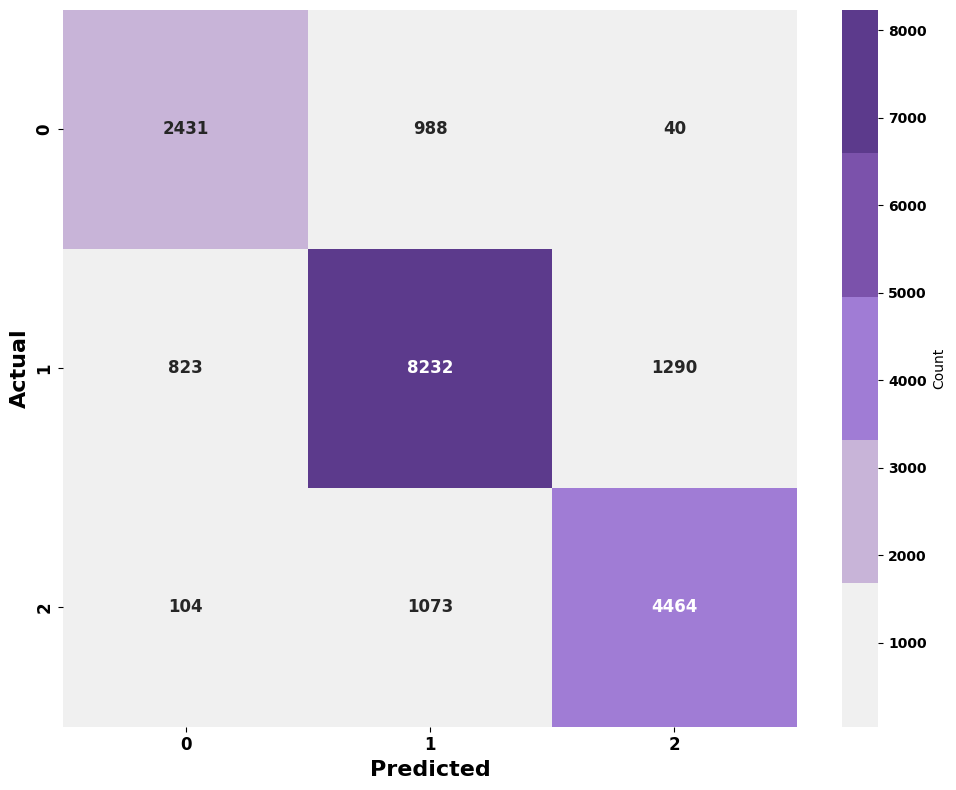


Training and evaluating ExtraTrees...
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-Score: 0.78
Training Time: 18.48 seconds
Testing Time: 0.72 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      3459
           1       0.80      0.80      0.80     10345
           2       0.77      0.78      0.78      5641

    accuracy                           0.78     19445
   macro avg       0.77      0.76      0.77     19445
weighted avg       0.78      0.78      0.78     19445



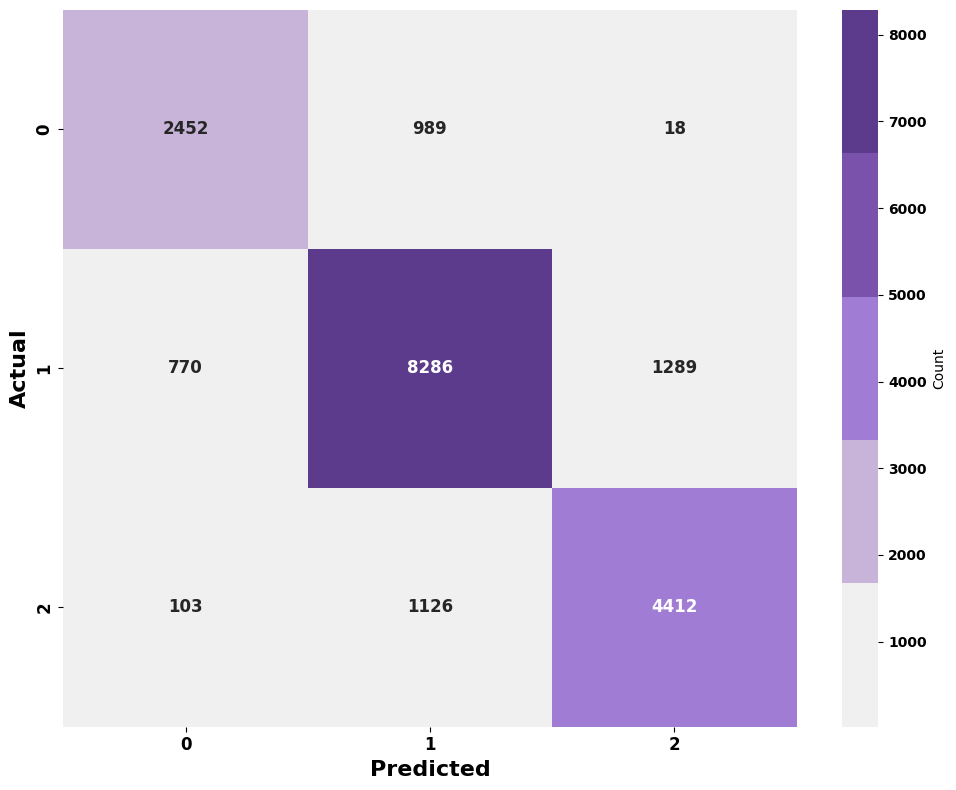


Training and evaluating KNN...
Accuracy: 0.66
Precision: 0.66
Recall: 0.66
F1-Score: 0.66
Training Time: 0.04 seconds
Testing Time: 12.55 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53      3459
           1       0.70      0.73      0.71     10345
           2       0.68      0.59      0.63      5641

    accuracy                           0.66     19445
   macro avg       0.63      0.62      0.62     19445
weighted avg       0.66      0.66      0.66     19445



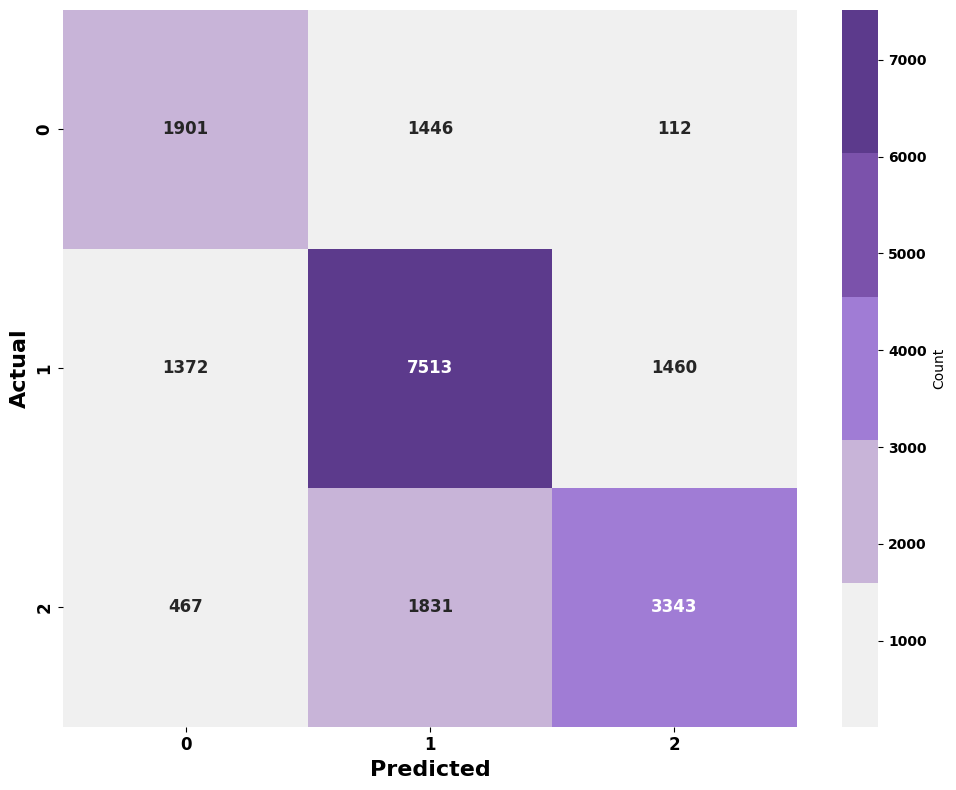


Training and evaluating MLP...
Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1-Score: 0.69
Training Time: 153.06 seconds
Testing Time: 0.04 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60      3459
           1       0.73      0.75      0.74     10345
           2       0.71      0.63      0.67      5641

    accuracy                           0.69     19445
   macro avg       0.67      0.67      0.67     19445
weighted avg       0.69      0.69      0.69     19445



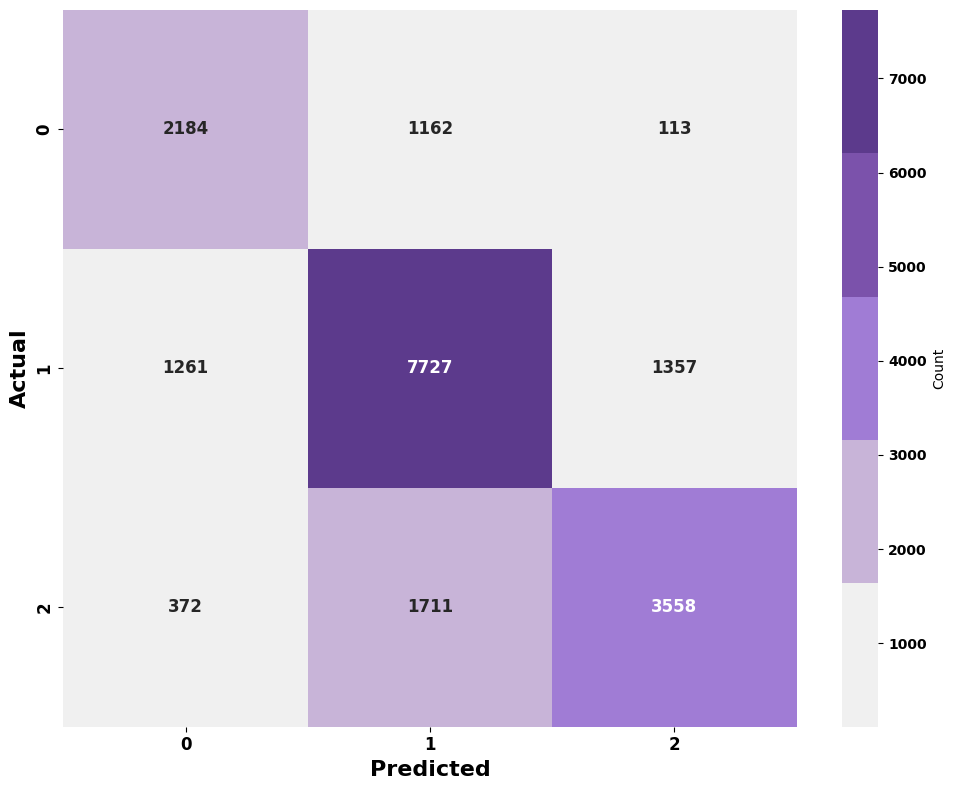

In [ ]:
# Train and evaluate models
results = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train_imbal, y_test_imbal)




AUROC Scores for Bagging:
Class 0: 0.9370
Class 1: 0.8533
Class 2: 0.9264
Weighted Average: 0.8894

AUROC Scores for ExtraTrees:
Class 0: 0.9385
Class 1: 0.8517
Class 2: 0.9253
Weighted Average: 0.8885

AUROC Scores for KNN:
Class 0: 0.8270
Class 1: 0.7412
Class 2: 0.8260
Weighted Average: 0.7811

AUROC Scores for MLP:
Class 0: 0.8813
Class 1: 0.7854
Class 2: 0.8634
Weighted Average: 0.8251


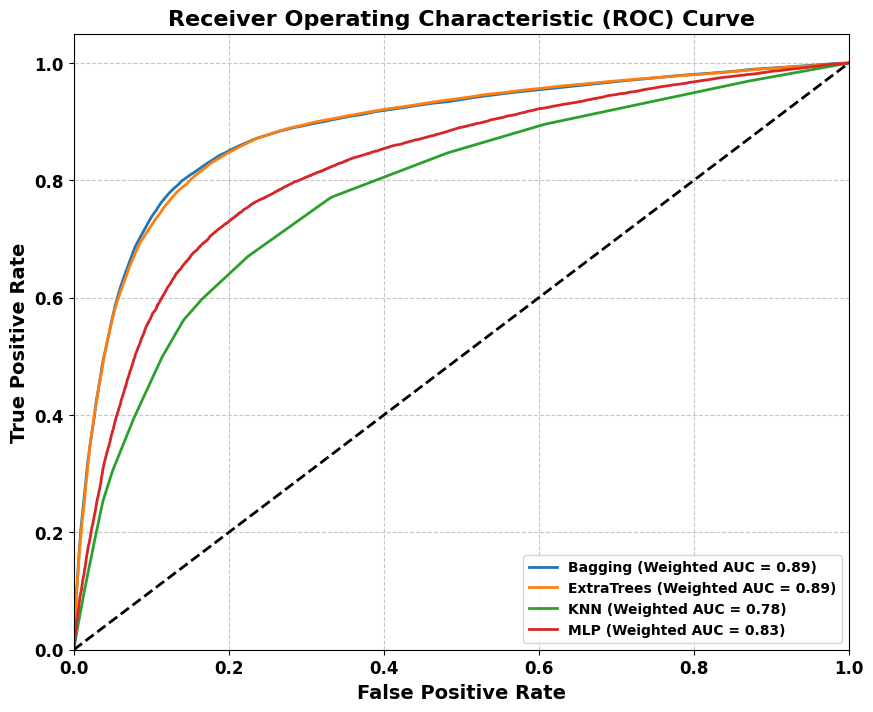

In [ ]:
# Plot ROC curves
plot_roc_curves(results, X_test_scaled, y_test_imbal)

In [ ]:
# Print summary of results
print("\nSummary of Results:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {result['accuracy']:.2f}")
    print(f"  Training Time: {result['train_time']:.2f} seconds")
    print(f"  Testing Time: {result['test_time']:.2f} seconds")
    print()


Summary of Results:
Bagging:
  Accuracy: 0.78
  Training Time: 193.36 seconds
  Testing Time: 2.48 seconds

ExtraTrees:
  Accuracy: 0.78
  Training Time: 18.48 seconds
  Testing Time: 0.72 seconds

KNN:
  Accuracy: 0.66
  Training Time: 0.04 seconds
  Testing Time: 12.55 seconds

MLP:
  Accuracy: 0.69
  Training Time: 153.06 seconds
  Testing Time: 0.04 seconds



**Balanced Dataset using Random Oversampling (ROS) for model building**

In [ ]:
# Separating the features (X) from the target variable (y)
X = steptrain10_balanced.drop('Credit_Score', axis=1)  # X contains all columns except 'Credit_Score'
y = steptrain10_balanced['Credit_Score']  # y contains only the 'Credit_Score' column


In [ ]:

# Step 1: Apply Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)  # Initialize the RandomOverSampler with a fixed random state for reproducibility
X_resampled, y_resampled = ros.fit_resample(X, y)  # Resample X and y to create a balanced dataset


In [ ]:
# Step 3: Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Verify the class distribution in the training set after Random Over Sampling (ROS)
print("\nClass distribution in y_train after Random Over Sampling (ROS):")
print(y_train.value_counts())


Shape of X_train: (124137, 41)
Shape of X_test: (31035, 41)
Shape of y_train: (124137,)
Shape of y_test: (31035,)

Class distribution in y_train after Random Over Sampling (ROS):
Credit_Score
1    41379
0    41379
2    41379
Name: count, dtype: int64


In [ ]:
# Initialize the StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Only transform the testing data using the already-fitted scaler



Training and evaluating Bagging...
Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1-Score: 0.9
Training Time: 262.16 seconds
Testing Time: 2.04 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     10345
           1       0.94      0.76      0.84     10345
           2       0.88      0.95      0.91     10345

    accuracy                           0.90     31035
   macro avg       0.90      0.90      0.90     31035
weighted avg       0.90      0.90      0.90     31035



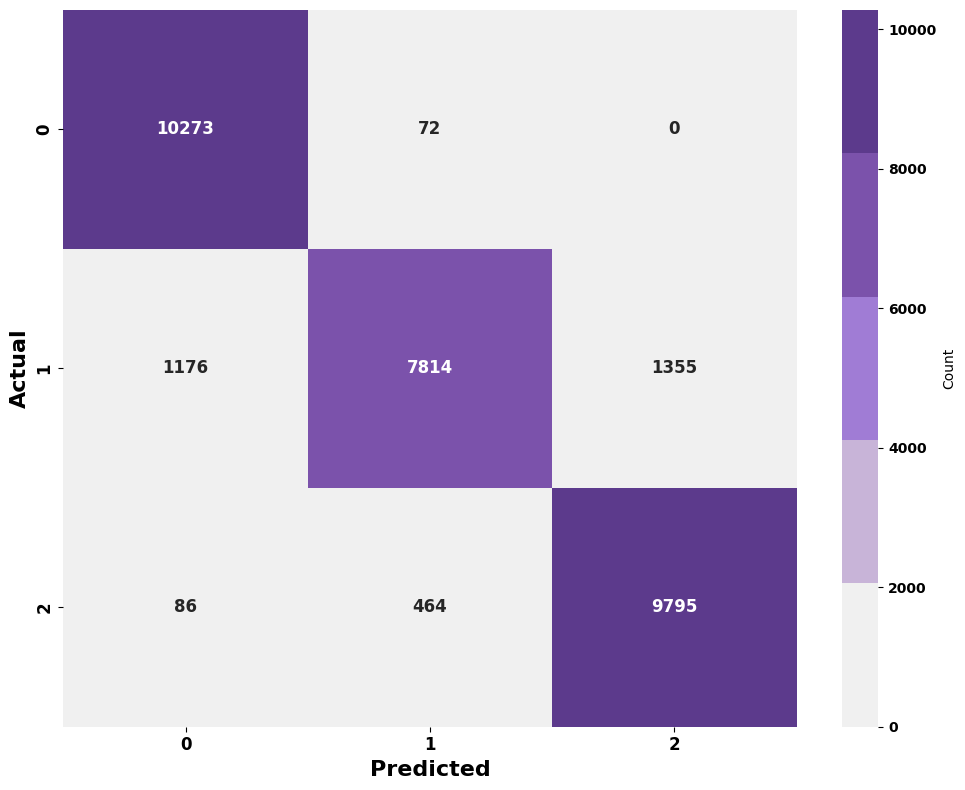


Training and evaluating ExtraTrees...
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.9
Training Time: 29.20 seconds
Testing Time: 1.10 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10345
           1       0.93      0.78      0.85     10345
           2       0.88      0.94      0.91     10345

    accuracy                           0.91     31035
   macro avg       0.91      0.91      0.90     31035
weighted avg       0.91      0.91      0.90     31035



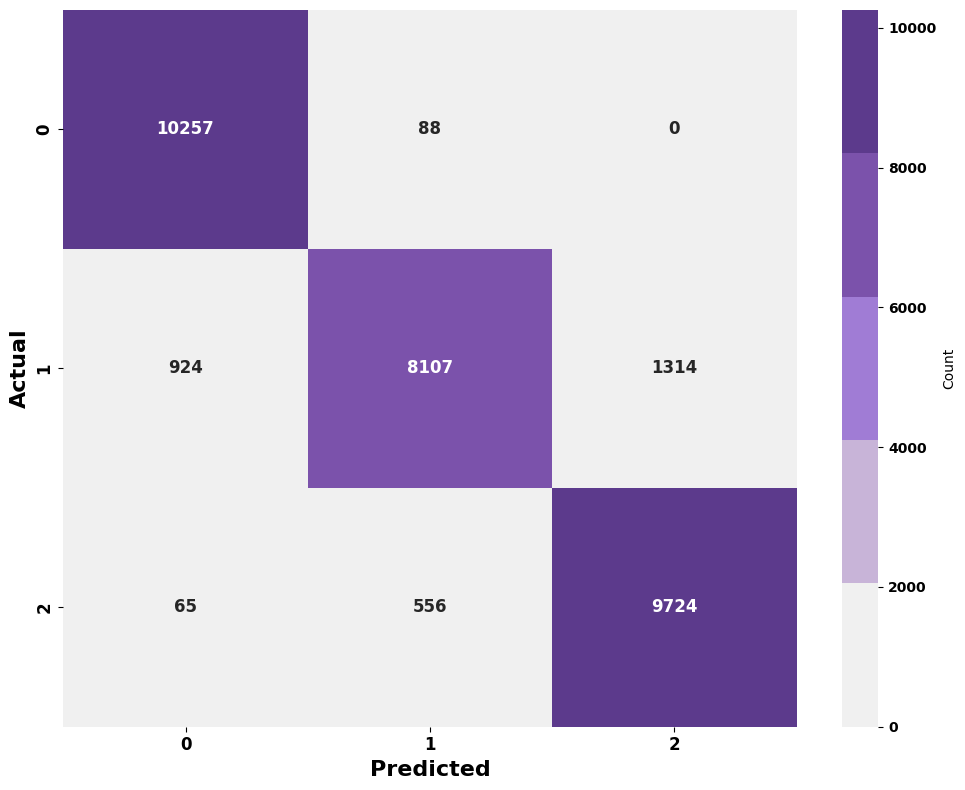


Training and evaluating KNN...
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-Score: 0.73
Training Time: 0.06 seconds
Testing Time: 30.47 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80     10345
           1       0.73      0.52      0.61     10345
           2       0.78      0.78      0.78     10345

    accuracy                           0.74     31035
   macro avg       0.74      0.74      0.73     31035
weighted avg       0.74      0.74      0.73     31035



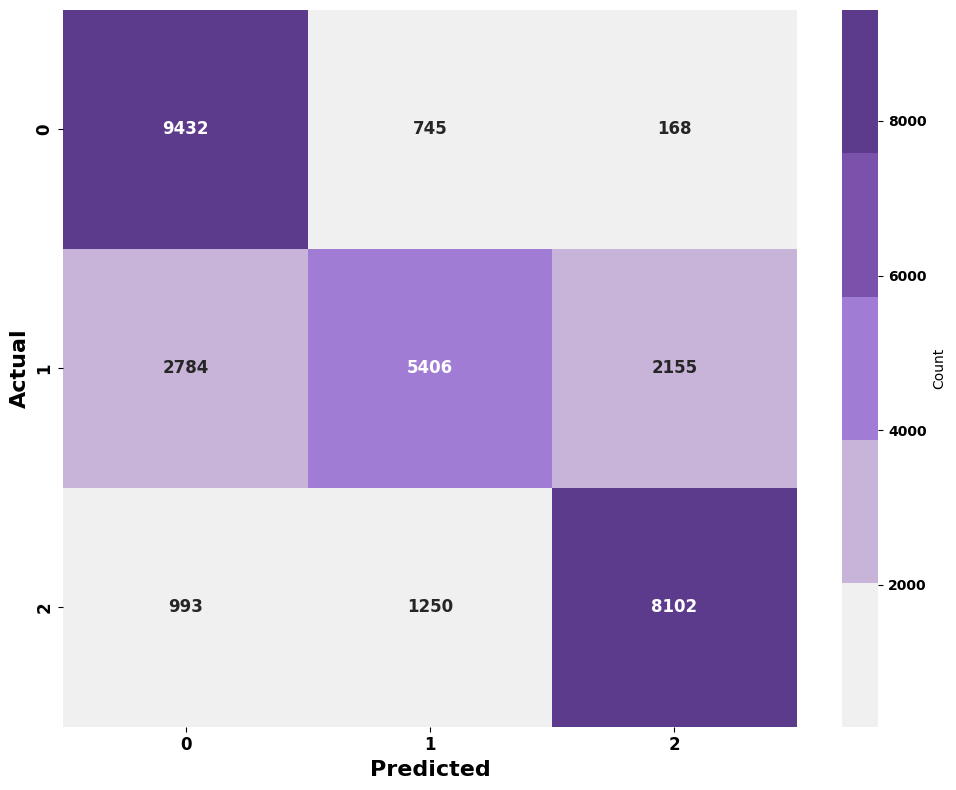


Training and evaluating MLP...
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-Score: 0.73
Training Time: 290.73 seconds
Testing Time: 0.10 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80     10345
           1       0.72      0.54      0.62     10345
           2       0.76      0.81      0.78     10345

    accuracy                           0.74     31035
   macro avg       0.74      0.74      0.73     31035
weighted avg       0.74      0.74      0.73     31035



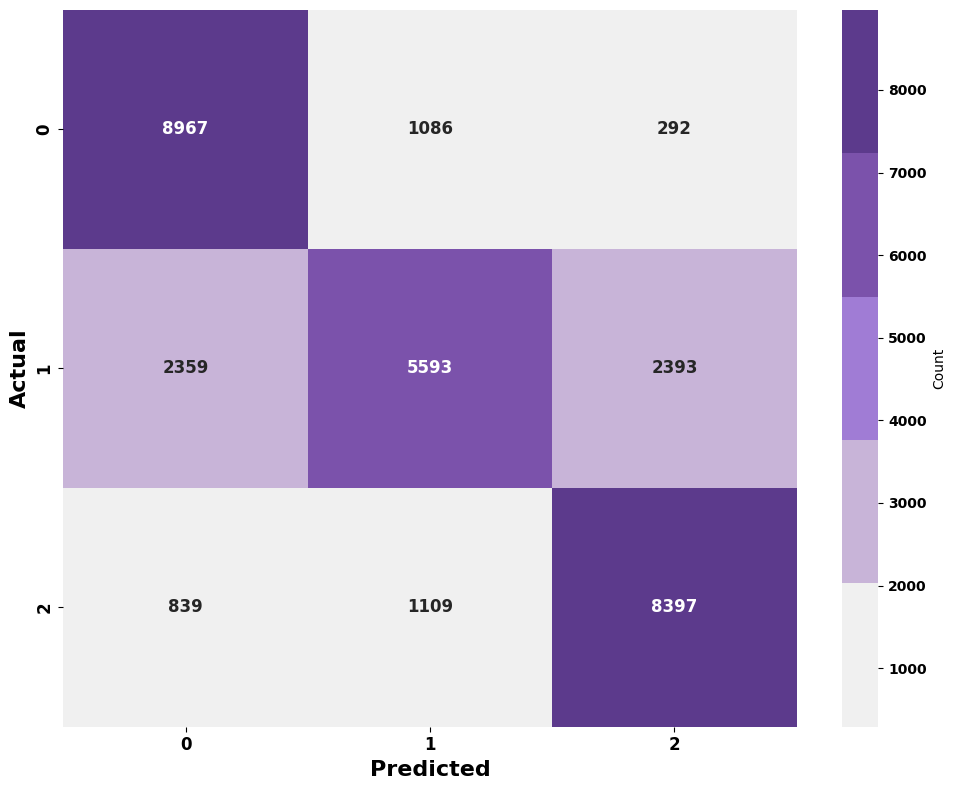

In [ ]:
# Call the train_and_evaluate_models function
results = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)


AUROC Scores for Bagging:
Class 0: 0.9959
Class 1: 0.9610
Class 2: 0.9806
Weighted Average: 0.9792

AUROC Scores for ExtraTrees:
Class 0: 0.9984
Class 1: 0.9756
Class 2: 0.9854
Weighted Average: 0.9865

AUROC Scores for KNN:
Class 0: 0.9352
Class 1: 0.7978
Class 2: 0.9124
Weighted Average: 0.8818

AUROC Scores for MLP:
Class 0: 0.9221
Class 1: 0.7930
Class 2: 0.9061
Weighted Average: 0.8738


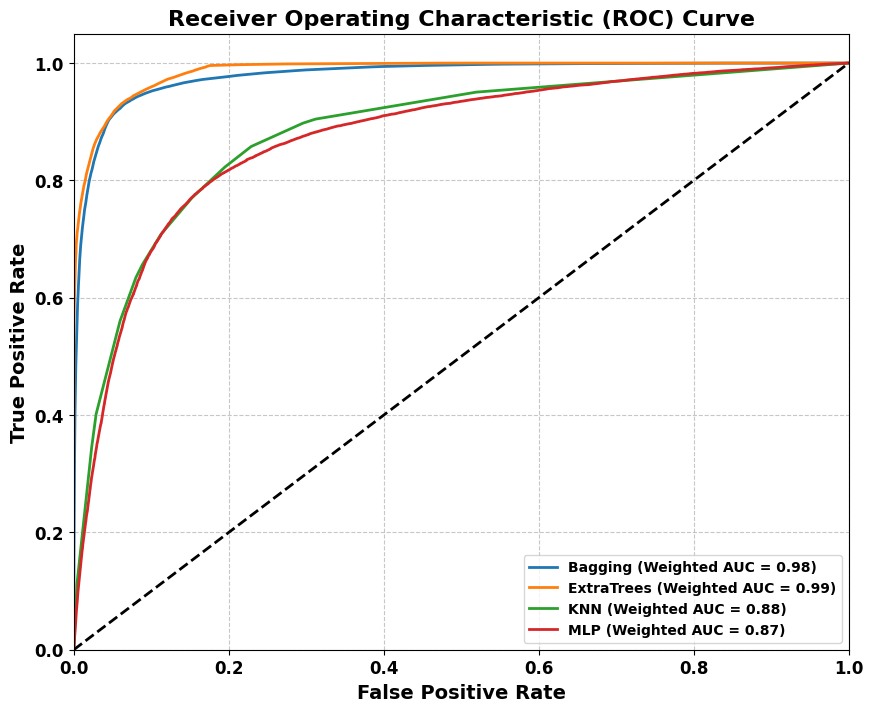


Summary of Results:
Bagging:
  Accuracy: 0.90
  Training Time: 262.16 seconds
  Testing Time: 2.04 seconds

ExtraTrees:
  Accuracy: 0.91
  Training Time: 29.20 seconds
  Testing Time: 1.10 seconds

KNN:
  Accuracy: 0.74
  Training Time: 0.06 seconds
  Testing Time: 30.47 seconds

MLP:
  Accuracy: 0.74
  Training Time: 290.73 seconds
  Testing Time: 0.10 seconds



In [ ]:
# Function to plot ROC curves for all models in the results dictionary
plot_roc_curves(results, X_test_scaled, y_test)

# Print a summary of the results (accuracy, training time, and testing time) for each model
print("\nSummary of Results:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {result['accuracy']:.2f}")
    print(f"  Training Time: {result['train_time']:.2f} seconds")
    print(f"  Testing Time: {result['test_time']:.2f} seconds")
    print()  # Print an empty line for better readability


**Cross Validation**


ExtraTrees Cross-Validation Scores: [0.88545191 0.8881102  0.88625745 0.88851297 0.88569357 0.88649911
 0.88464637 0.88471763 0.88922903 0.88753726]

ExtraTrees Mean CV Score: 0.8867

ExtraTrees Standard Deviation of CV Score: 0.0015


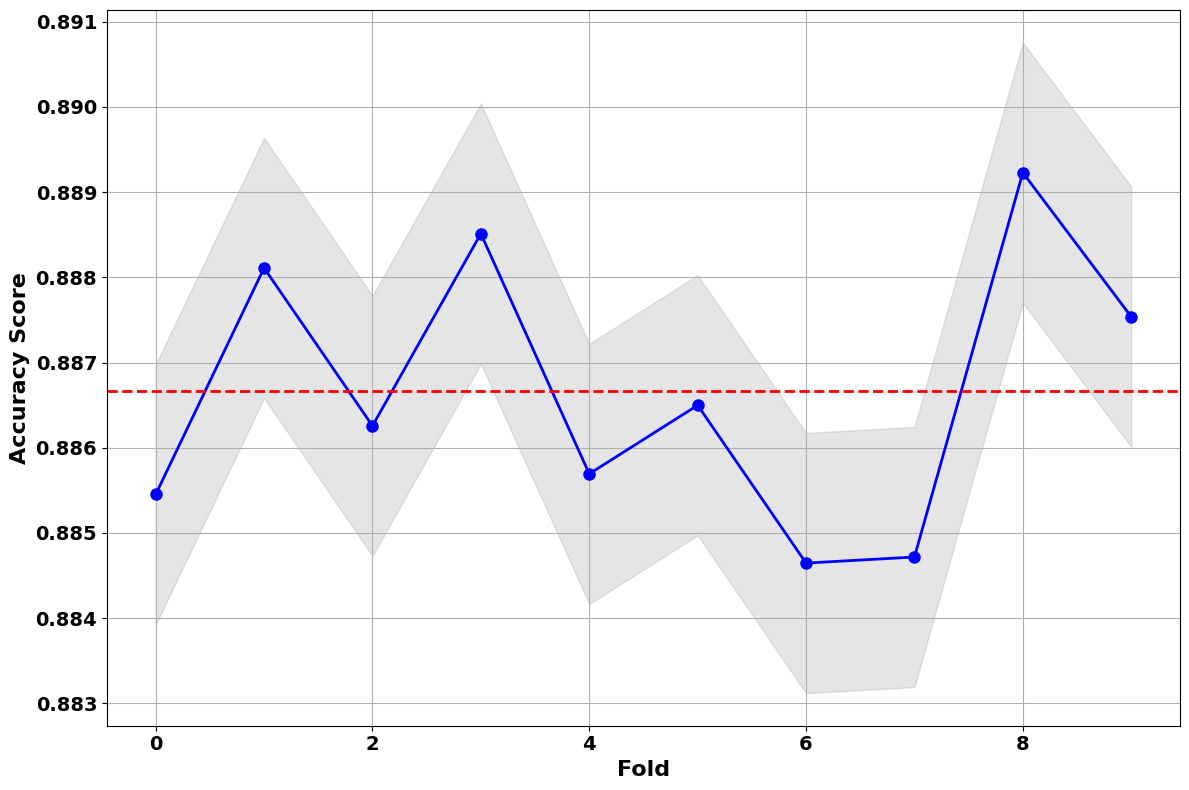

In [ ]:
#define the model
models = get_models()
et_model = models["ExtraTrees"]  # Select the ExtraTrees model from the dictionary

# Perform cross-validation for the ExtraTrees model using 10-fold CV
et_cv_scores = cross_val_score(et_model, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Print cross-validation results with bold formatting
print(f"\n\033[1mExtraTrees Cross-Validation Scores: {et_cv_scores}\033[0m")
print(f"\n\033[1mExtraTrees Mean CV Score: {et_cv_scores.mean():.4f}\033[0m")
print(f"\n\033[1mExtraTrees Standard Deviation of CV Score: {et_cv_scores.std():.4f}\033[0m")

# Plot the cross-validation scores
plt.figure(figsize=(12, 8))

# Plot the accuracy scores for each fold of cross-validation
plt.plot(range(len(et_cv_scores)), et_cv_scores, marker='o', linestyle='-', color='b',
         label='ExtraTrees CV Accuracy Score', linewidth=2, markersize=8)

# Plot the mean CV score as a dashed line
plt.axhline(y=et_cv_scores.mean(), color='r', linestyle='--',
            label=f'ExtraTrees Mean CV Score: {et_cv_scores.mean():.4f}', linewidth=2)

# Plot the standard deviation range as a shaded area
plt.fill_between(range(len(et_cv_scores)), et_cv_scores - et_cv_scores.std(),
                 et_cv_scores + et_cv_scores.std(), color='gray', alpha=0.2,
                 label=f'ExtraTrees Std Dev: {et_cv_scores.std():.4f}')

# Set labels with bold formatting and increased font size
plt.xlabel('Fold', fontweight='bold', fontsize=16)
plt.ylabel('Accuracy Score', fontweight='bold', fontsize=16)


# Enable grid
plt.grid(True)

# Increase font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

# Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()


**Feature Importance**

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.9
Training Time: 32.78 seconds
Testing Time: 1.07 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10345
           1       0.93      0.78      0.85     10345
           2       0.88      0.94      0.91     10345

    accuracy                           0.91     31035
   macro avg       0.91      0.91      0.90     31035
weighted avg       0.91      0.91      0.90     31035



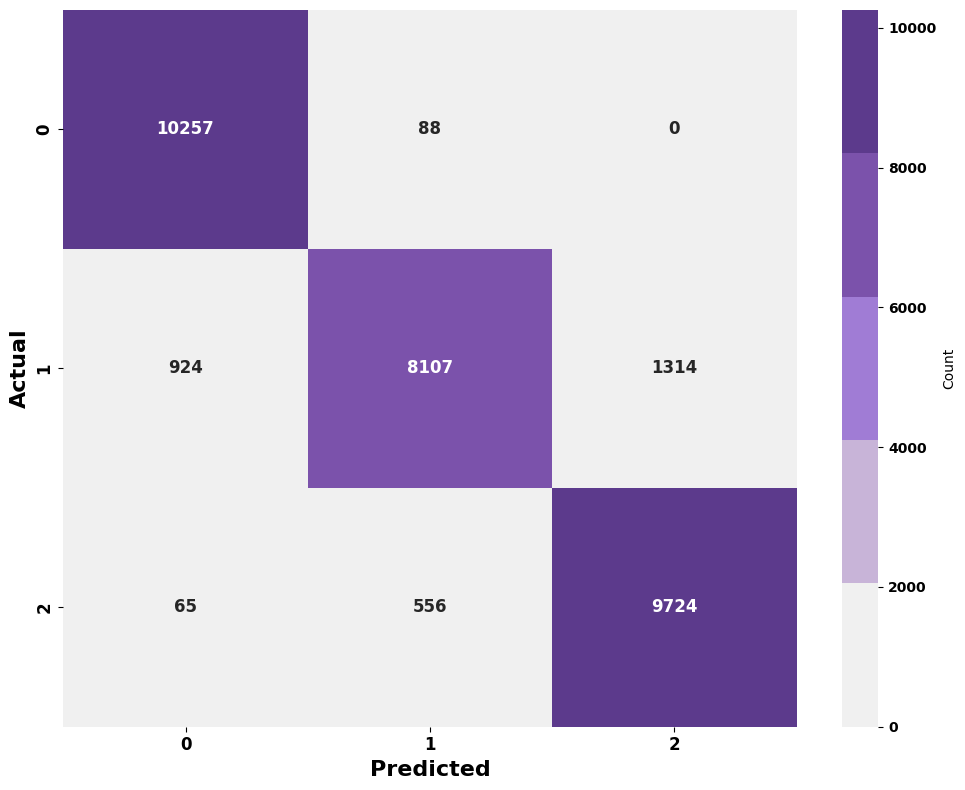

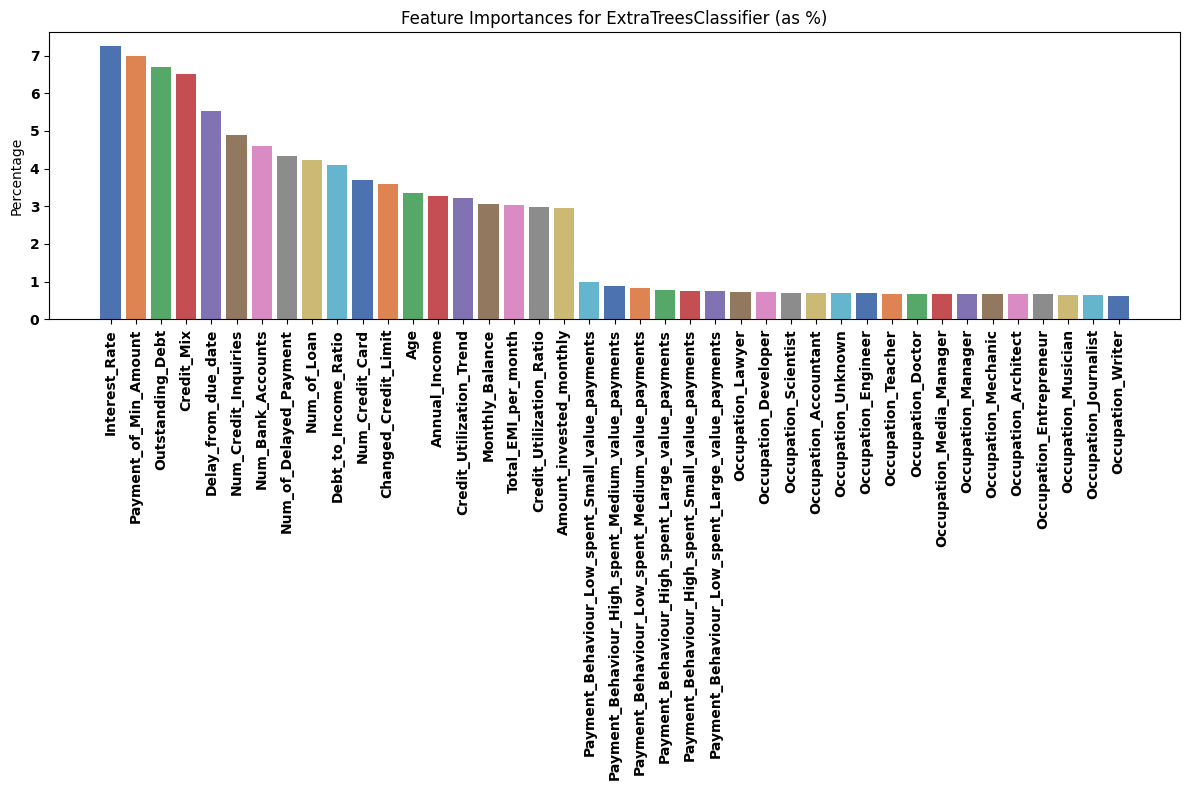

In [ ]:
# Train and evaluate the ExtraTrees model
train_and_evaluate_model(et_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Function to plot feature importances as percentages
def plot_feature_importance_as_percentage(model, feature_names):
    importances = model.feature_importances_  # Get the feature importances from the model
    importances_percentage = 100.0 * (importances / importances.sum())  # Convert importances to percentages
    indices = np.argsort(importances_percentage)[::-1]  # Sort indices based on importance values in descending order

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    plt.title(f"Feature Importances for {model.__class__.__name__} (as %)")
    colors = sns.color_palette("deep", len(feature_names))  # Use a deep color palette for the bars
    plt.bar(range(len(feature_names)), importances_percentage[indices], align="center", color=colors)  # Plot bars
    plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)  # Set feature names on the x-axis
    plt.ylabel('Percentage')  # Label the y-axis
    plt.tight_layout()  # Ensure everything fits properly
    plt.show()  # Show the plot

# List of feature names (columns from X)
feature_names = X.columns

# Plot feature importances as percentages for the ExtraTrees model
plot_feature_importance_as_percentage(et_model, feature_names)


**Hyperparameter Tunning**

In [ ]:
# Parameter grids for hyperparameter tuning for KNN and MLP models
param_grids = {
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],  # Number of neighbors for KNN
        'weights': ['uniform', 'distance'],  # Weight function used in prediction
        'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']  # Distance metric to use
    },
    "MLP": {
        "hidden_layer_sizes": [(50,), (100,), (100, 50), (100, 100, 50)],  # Number of neurons in each hidden layer
        "activation": ['identity', 'logistic', 'tanh', 'relu'],  # Activation function for hidden layers
        "solver": ['lbfgs', 'sgd', 'adam'],  # Optimization solver
        "alpha": [0.0001, 0.001, 0.01, 0.1],  # Regularization term (L2 penalty)
        "learning_rate": ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
        "learning_rate_init": [0.001, 0.01, 0.1],  # Initial learning rate
        "max_iter": [200, 500, 1000],  # Maximum number of iterations
        "early_stopping": [True, False],  # Enable or disable early stopping
        "batch_size": ['auto', 64, 128, 256],  # Minibatch size for stochastic optimizers
    },
}


In [ ]:
# Function to perform hyperparameter tuning using RandomizedSearchCV
def tune_hyperparameters(model, param_grid, X_train, y_train):
    random_search = RandomizedSearchCV(
        model, param_distributions=param_grid,  # Parameter grid to search
        n_iter=10,  # Number of parameter settings that are sampled
        scoring='accuracy',  # Scoring metric for evaluation
        cv=3,  # 3-fold cross-validation
        random_state=42,  # For reproducibility
        n_jobs=-1,  # Use all available CPU cores
        verbose=1  # Print progress during search
    )
    random_search.fit(X_train, y_train)  # Fit RandomizedSearchCV to the training data
    return random_search.best_estimator_  # Return the best model after tuning


Tuning hyperparameters and evaluating KNN...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1-Score: 0.85
Training Time: 0.08 seconds
Testing Time: 219.85 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     10345
           1       0.91      0.64      0.75     10345
           2       0.84      0.93      0.88     10345

    accuracy                           0.85     31035
   macro avg       0.86      0.85      0.85     31035
weighted avg       0.86      0.85      0.85     31035



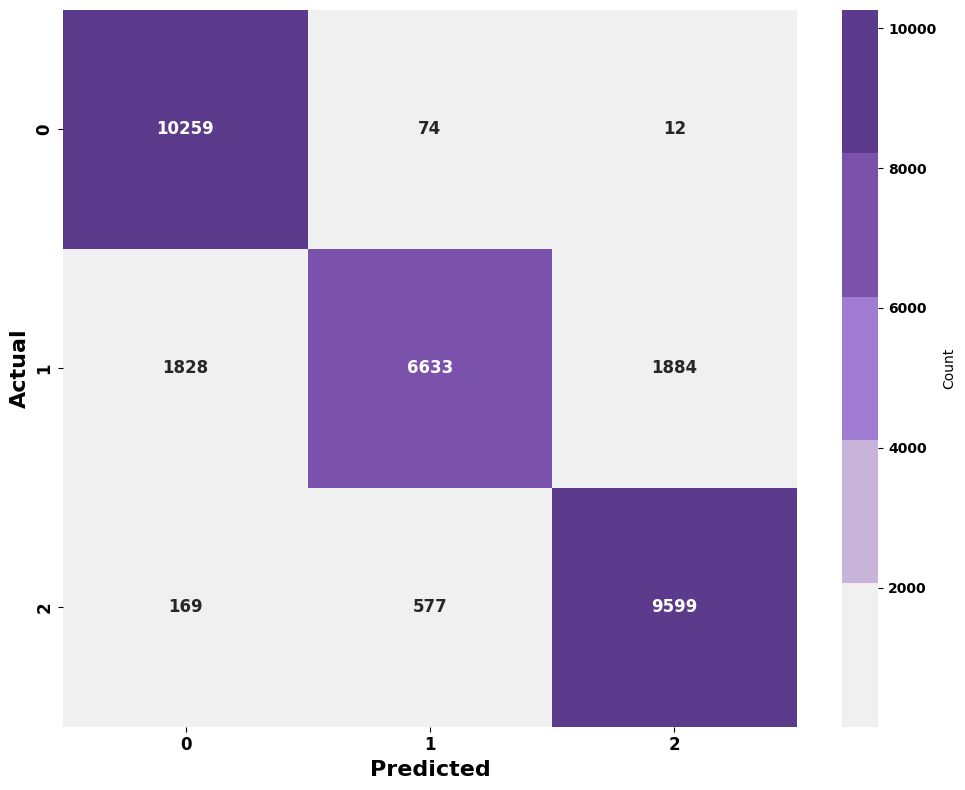

KNN Evaluation completed. Accuracy: 0.8500, Train Time: 0.08 sec, Test Time: 219.85 sec

Tuning hyperparameters and evaluating MLP...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-Score: 0.8
Training Time: 1724.69 seconds
Testing Time: 0.15 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88     10345
           1       0.77      0.63      0.69     10345
           2       0.80      0.84      0.82     10345

    accuracy                           0.80     31035
   macro avg       0.80      0.80      0.80     31035
weighted avg       0.80      0.80      0.80     31035



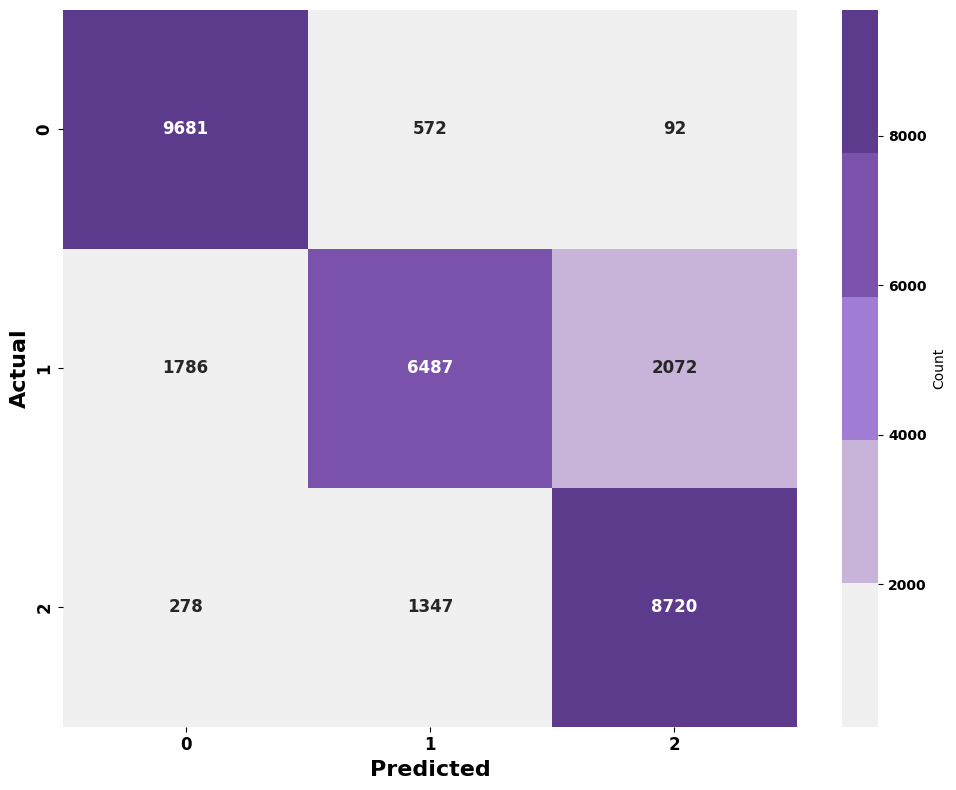

MLP Evaluation completed. Accuracy: 0.8000, Train Time: 1724.69 sec, Test Time: 0.15 sec

AUROC Scores for KNN:
Class 0: 0.9732
Class 1: 0.8861
Class 2: 0.9566
Weighted Average: 0.9386

AUROC Scores for MLP:
Class 0: 0.9538
Class 1: 0.8212
Class 2: 0.9335
Weighted Average: 0.9029


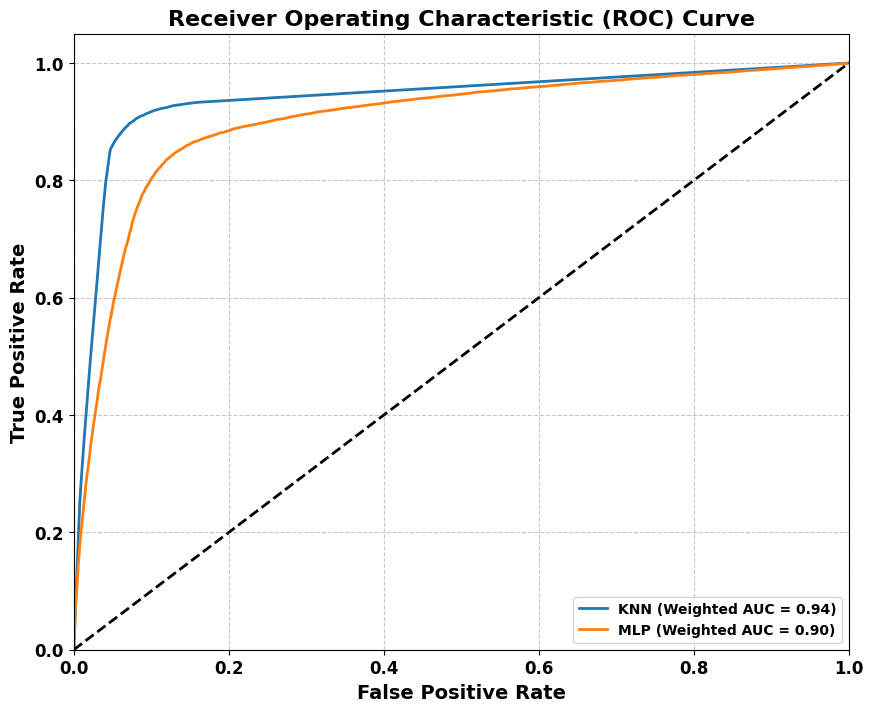

In [ ]:

# Function to train and evaluate models with hyperparameter tuning
def train_and_evaluate_models_with_tuning(X_train, X_test, y_train, y_test):
    models = get_models()  # Retrieve models using the get_models function
    models_to_tune = ["KNN", "MLP"]  # Models that will undergo hyperparameter tuning
    results = {}  # Dictionary to store results for further evaluation

    # Loop through each model that needs hyperparameter tuning
    for name in models_to_tune:
        model = models[name]
        print(f"\nTuning hyperparameters and evaluating {name}...")

        # Tune hyperparameters for the model
        best_model = tune_hyperparameters(model, param_grids[name], X_train, y_train)

        # Use the train_and_evaluate_model function to evaluate the tuned model
        trained_model, accuracy, train_time, test_time = train_and_evaluate_model(
            best_model, X_train, X_test, y_train, y_test
        )

        # Store the results including trained model and evaluation metrics
        results[name] = {
            'model': trained_model,
            'accuracy': accuracy,
            'train_time': train_time,
            'test_time': test_time
        }

        # Print evaluation summary for each model
        print(f"{name} Evaluation completed. Accuracy: {accuracy:.4f}, Train Time: {train_time:.2f} sec, Test Time: {test_time:.2f} sec")

    return results  # Return the results with tuned models and all metrics

# Train and evaluate models with hyperparameter tuning
results = train_and_evaluate_models_with_tuning(X_train_scaled, X_test_scaled, y_train, y_test)

# Plot ROC curves for the tuned models
plot_roc_curves(results, X_test_scaled, y_test)
